In [1]:
import pandas as pd
import scanpy as sc 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import os,re
%load_ext rpy2.ipython

In [2]:
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/")

In [3]:
os.getcwd()

'/data5/maolp/Gaofeng_All_matrix/Allcount'

In [4]:
%run /home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/Cell_types_list.py

In [5]:
Cell_types_list

['HSC_MPP',
 'MEP',
 'MEMP',
 'Pro-B',
 'Large pre-B',
 'Small pre-B',
 'CXCR5- Naïve B',
 'CXCR5+ Naïve B',
 'DN(Q) T',
 'DP(P) T',
 'DP(Q) T',
 'Treg',
 'Cycling Treg',
 'Naïve CD4 T',
 'Naïve CD8 T',
 'abT(entry)',
 'Tem',
 'Th17like_INNATE_T',
 'NK T',
 'Gamma Delta V1 T',
 'Gamma Delta V2 T',
 'GNG4 +CD8aa+T',
 'ILC2/3',
 'CX3CR1+ NK',
 'CXCR6+ NK',
 'CD56highCD16low NK',
 'Myeloid-CD177',
 'Classical Monocytes',
 'CD14+PPBP+ Monocytes',
 'Macrophages',
 'DC1',
 'DC2',
 'pDC',
 'Megakaryocytes',
 'Early_ERY',
 'Mid_ERY',
 'Late_ERY',
 'Endothelial cells',
 'Others']

In [6]:


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', 'No data for colormapping provided via', UserWarning)


In [7]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, hex2color, to_hex

def gradient(hex_color, num_steps=5):

    rgb_color = np.array(hex2color(hex_color))

    lighter_color = rgb_color + (1 - rgb_color) * 0.5 
    color_map = LinearSegmentedColormap.from_list("", [rgb_color, lighter_color])

    colors = color_map(np.linspace(0, 1, num_steps))
 
    return [to_hex(color) for color in colors]

colors = ["#C71000FF","#8A4198FF",  "#023f75", "#008EA0FF", 
 "#266b69","#f6c619", "#FF6348FF","#c29f62"]
steps = [3, 5, 15, 3, 4, 3, 5, 2]  
gradient_colors = {}
for color, num_steps in zip(colors, steps):
    gradient_colors[color] = gradient(color, num_steps)

print(gradient_colors)

{'#C71000FF': ['#c71000', '#d54c40', '#e38880'], '#8A4198FF': ['#8a4198', '#9959a5', '#a771b2', '#b689bf', '#c4a0cc'], '#023f75': ['#023f75', '#0b467a', '#144d7f', '#1d5384', '#265a89', '#2f618e', '#386892', '#416f98', '#4a769d', '#537da1', '#5c84a6', '#668bab', '#6f91b0', '#7898b5', '#809fba'], '#008EA0FF': ['#008ea0', '#40aab8', '#80c6d0'], '#266b69': ['#266b69', '#4a8482', '#6e9c9b', '#92b5b4'], '#f6c619': ['#f6c619', '#f8d453', '#fbe28c'], '#FF6348FF': ['#ff6348', '#ff775f', '#ff8a76', '#ff9e8d', '#ffb1a3'], '#c29f62': ['#c29f62', '#e0cfb0']}


In [8]:
len(['#023f75', '#124b7e', '#174f80', '#1c5383',  '#275b89', '#2c5f8c',  '#416f98', '#46739a', '#4c779d', '#517ba0', '#567fa3', '#5c83a6', '#6187a9',  '#6c8faf', '#7193b2', '#7c9bb7', '#809fba'])

17

In [9]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, hex2color, to_hex

def gradient(hex_color, num_steps=5):

    rgb_color = np.array(hex2color(hex_color))

    lighter_color = rgb_color + (1 - rgb_color) * 0.5  
    color_map = LinearSegmentedColormap.from_list("", [rgb_color, lighter_color])

    colors = color_map(np.linspace(0, 1, num_steps))

    return [to_hex(color) for color in colors]

colors = [ "#023f75"]
steps = [25]  
gradient_colors = {}
for color, num_steps in zip(colors, steps):
    gradient_colors[color] = gradient(color, num_steps)

print(gradient_colors)

{'#023f75': ['#023f75', '#074378', '#0c477b', '#124b7e', '#174f80', '#1c5383', '#225786', '#275b89', '#2c5f8c', '#32638f', '#376792', '#3c6b95', '#416f98', '#46739a', '#4c779d', '#517ba0', '#567fa3', '#5c83a6', '#6187a9', '#668bac', '#6c8faf', '#7193b2', '#7697b4', '#7c9bb7', '#809fba']}


In [10]:
%%R -w 3000 -h 1800 -r 200

library(dplyr)
library(ggplot2)

adata1_obs <- read.csv('./All_scanpyData/UmapData//adata1_umap_obsdata.csv')
head(adata1_obs)
table(adata1_obs$Last_cell_type_num,adata1_obs$Cell_lineage)

R[write to console]: 
载入程辑包：‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




                         
                          B_CELL    DC MK/ERY MYELOID    NK OTHERS PRECURSOR
  1_HSC_MPP                    0     0      0       0     0      0      3248
  10_DP(P) T                   0     0      0       0     0      0         0
  11_DP(Q) T                   0     0      0       0     0      0         0
  12_Treg                      0     0      0       0     0      0         0
  13_Cycling Treg              0     0      0       0     0      0         0
  14_Naïve CD4 T               0     0      0       0     0      0         0
  15_Naïve CD8 T               0     0      0       0     0      0         0
  16_abT(entry)                0     0      0       0     0      0         0
  17_Tem                       0     0      0       0     0      0         0
  18_Th17like_INNATE_T         0     0      0       0     0      0         0
  19_NK T                      0     0      0       0     0      0         0
  2_MEP                        0     0      0     

In [11]:
# import numpy as np
# import matplotlib as mpl

# def generate_gradient(color, n):
#     cmap = mpl.colors.LinearSegmentedColormap.from_list("", [color,"white"])
#     gradient = list(map(mpl.colors.rgb2hex, cmap(np.linspace(0, 1, n))))
#     return gradient


# color = "#ff0000"  # 红色
# n = 16  # 生成10个渐变色
# gradient = generate_gradient(color, n)


# for color in gradient:
#     print(color)

In [12]:

# Oldcell_colors=['#972b1d', '#a24236', '#ae5a4f',
#                 '#6a73cf', '#888fd9', '#747cd2', '#9ca2df', '#acb1e4',
#                 '#fa6e01', '#fa7812', '#fb8123', '#fb8b34', '#fb9545', 
#                 '#fc9e56', '#fca867', '#fcb278', '#fdbb88', '#fdc599', 
#                '#fcae72', '#fdbf8e', '#fdcfaa', '#fedfc7', '#fdbb88',
#                 '#edae11',   '#f3c960', '#f5d27a',
#               '#009966', '#28a97e', '#5ebf9e', '#6bc4a6',
#                 '#0081c9', '#44a3d7', '#77bce2',
#                 '#f6313e', '#f74c58', '#f9767e', '#f86871',
#                 '#c29f62', '#dac5a1']

Oldcell_colors = [
    '#c71000', '#d54c40', '#e38880',
    '#8a4198', '#9959a5', '#a771b2', '#b689bf', '#c4a0cc',
  '#023f75', '#124b7e', '#174f80',   '#416f98', '#46739a', '#4c779d', '#517ba0', '#567fa3', '#5c83a6', '#6187a9',  
    '#6c8faf', '#7193b2', '#7c9bb7', '#809fba','#7697b4', 
    '#008ea0', '#40aab8', '#80c6d0',
    '#266b69', '#4a8482', '#6e9c9b', '#92b5b4',
    '#f6c619', '#f8d453', '#fbe28c',
    '#ff6348', '#ff775f', '#ff8a76', '#ff9e8d', 
    '#c29f62', '#e0cfb0'
]
print(len(Oldcell_colors))
# print(len(Oldcell_colors))

39


In [13]:
cell_graident_colorsdict = dict(zip(Cell_types_list, Oldcell_colors))


for key, value in cell_graident_colorsdict.items():
    print("{}: {}".format(key, value))


HSC_MPP: #c71000
MEP: #d54c40
MEMP: #e38880
Pro-B: #8a4198
Large pre-B: #9959a5
Small pre-B: #a771b2
CXCR5- Naïve B: #b689bf
CXCR5+ Naïve B: #c4a0cc
DN(Q) T: #023f75
DP(P) T: #124b7e
DP(Q) T: #174f80
Treg: #416f98
Cycling Treg: #46739a
Naïve CD4 T: #4c779d
Naïve CD8 T: #517ba0
abT(entry): #567fa3
Tem: #5c83a6
Th17like_INNATE_T: #6187a9
NK T: #6c8faf
Gamma Delta V1 T: #7193b2
Gamma Delta V2 T: #7c9bb7
GNG4 +CD8aa+T: #809fba
ILC2/3: #7697b4
CX3CR1+ NK: #008ea0
CXCR6+ NK: #40aab8
CD56highCD16low NK: #80c6d0
Myeloid-CD177: #266b69
Classical Monocytes: #4a8482
CD14+PPBP+ Monocytes: #6e9c9b
Macrophages: #92b5b4
DC1: #f6c619
DC2: #f8d453
pDC: #fbe28c
Megakaryocytes: #ff6348
Early_ERY: #ff775f
Mid_ERY: #ff8a76
Late_ERY: #ff9e8d
Endothelial cells: #c29f62
Others: #e0cfb0


In [14]:
# import pandas as pd


# # Convert dictionary to pandas DataFrame
# dfclor = pd.DataFrame.from_dict(cell_colors, orient='index', columns=['Cell Type Color'])

# # Print the DataFrame
# print(dfclor)
# dfclor.to_csv('../All_scanpyData/dfcolor.csv')

In [15]:
mkdir -p ColorDict

In [16]:

import json

with open("./All_scanpyData/ColorDict/Cell_graident_colors.json", "w") as outfile:
    json.dump(cell_graident_colorsdict, outfile)


In [17]:
prefixes = [str(i) for i in range(1, 51)]

cell_graident_colors_prefixed = {
    f"{prefix}_{cell_type}": color for prefix, (cell_type, color) in zip(prefixes, cell_graident_colorsdict.items())
}
import json

with open("./All_scanpyData/ColorDict/Cell_graident_colors_prefixed.json", "w") as outfile:
    json.dump(cell_graident_colors_prefixed, outfile)

print(cell_graident_colors_prefixed)


{'1_HSC_MPP': '#c71000', '2_MEP': '#d54c40', '3_MEMP': '#e38880', '4_Pro-B': '#8a4198', '5_Large pre-B': '#9959a5', '6_Small pre-B': '#a771b2', '7_CXCR5- Naïve B': '#b689bf', '8_CXCR5+ Naïve B': '#c4a0cc', '9_DN(Q) T': '#023f75', '10_DP(P) T': '#124b7e', '11_DP(Q) T': '#174f80', '12_Treg': '#416f98', '13_Cycling Treg': '#46739a', '14_Naïve CD4 T': '#4c779d', '15_Naïve CD8 T': '#517ba0', '16_abT(entry)': '#567fa3', '17_Tem': '#5c83a6', '18_Th17like_INNATE_T': '#6187a9', '19_NK T': '#6c8faf', '20_Gamma Delta V1 T': '#7193b2', '21_Gamma Delta V2 T': '#7c9bb7', '22_GNG4 +CD8aa+T': '#809fba', '23_ILC2/3': '#7697b4', '24_CX3CR1+ NK': '#008ea0', '25_CXCR6+ NK': '#40aab8', '26_CD56highCD16low NK': '#80c6d0', '27_Myeloid-CD177': '#266b69', '28_Classical Monocytes': '#4a8482', '29_CD14+PPBP+ Monocytes': '#6e9c9b', '30_Macrophages': '#92b5b4', '31_DC1': '#f6c619', '32_DC2': '#f8d453', '33_pDC': '#fbe28c', '34_Megakaryocytes': '#ff6348', '35_Early_ERY': '#ff775f', '36_Mid_ERY': '#ff8a76', '37_Late

In [18]:
with open("./All_scanpyData/ColorDict/Cell_graident_colors_prefixed.json", "r") as infile:
    loaded_colors_dict = json.load(infile)

print(loaded_colors_dict)

{'1_HSC_MPP': '#c71000', '2_MEP': '#d54c40', '3_MEMP': '#e38880', '4_Pro-B': '#8a4198', '5_Large pre-B': '#9959a5', '6_Small pre-B': '#a771b2', '7_CXCR5- Naïve B': '#b689bf', '8_CXCR5+ Naïve B': '#c4a0cc', '9_DN(Q) T': '#023f75', '10_DP(P) T': '#124b7e', '11_DP(Q) T': '#174f80', '12_Treg': '#416f98', '13_Cycling Treg': '#46739a', '14_Naïve CD4 T': '#4c779d', '15_Naïve CD8 T': '#517ba0', '16_abT(entry)': '#567fa3', '17_Tem': '#5c83a6', '18_Th17like_INNATE_T': '#6187a9', '19_NK T': '#6c8faf', '20_Gamma Delta V1 T': '#7193b2', '21_Gamma Delta V2 T': '#7c9bb7', '22_GNG4 +CD8aa+T': '#809fba', '23_ILC2/3': '#7697b4', '24_CX3CR1+ NK': '#008ea0', '25_CXCR6+ NK': '#40aab8', '26_CD56highCD16low NK': '#80c6d0', '27_Myeloid-CD177': '#266b69', '28_Classical Monocytes': '#4a8482', '29_CD14+PPBP+ Monocytes': '#6e9c9b', '30_Macrophages': '#92b5b4', '31_DC1': '#f6c619', '32_DC2': '#f8d453', '33_pDC': '#fbe28c', '34_Megakaryocytes': '#ff6348', '35_Early_ERY': '#ff775f', '36_Mid_ERY': '#ff8a76', '37_Late

In [19]:
%%R -w 1800 -h 2600 -r 180

library(jsonlite)

file_path2 <- "./All_scanpyData/ColorDict/Cell_graident_colors.json"
colors_graident_dict <- fromJSON(file_path2)
file_path3 <- "./All_scanpyData/ColorDict/Cell_graident_colors_prefixed.json"
colors_graident_dict_num <- fromJSON(file_path3)
colors_graident_dict
names(colors_graident_dict)
adata1_obs <- read.csv('./All_scanpyData/UmapData/adata1_umap_obsdata.csv')
head(adata1_obs )
order(levels(factor(adata1_obs$Last_cell_type_num)))

prefixes <- as.numeric(gsub("_.*$", "", levels(factor(adata1_obs$Last_cell_type_num))))


sorted_indices <- order(prefixes)


sorted_cell_types <- levels(factor(adata1_obs$Last_cell_type_num))[sorted_indices]

print(sorted_cell_types)
grouped_data <-adata1_obs %>%
  group_by( AdjustedID,Last_cell_type_num,new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))%>% mutate(Last_cell_type_num = factor(Last_cell_type_num,levels=sorted_cell_types))


 [1] "1_HSC_MPP"               "2_MEP"                  
 [3] "3_MEMP"                  "4_Pro-B"                
 [5] "5_Large pre-B"           "6_Small pre-B"          
 [7] "7_CXCR5- Naïve B"        "8_CXCR5+ Naïve B"       
 [9] "9_DN(Q) T"               "10_DP(P) T"             
[11] "11_DP(Q) T"              "12_Treg"                
[13] "13_Cycling Treg"         "14_Naïve CD4 T"         
[15] "15_Naïve CD8 T"          "16_abT(entry)"          
[17] "17_Tem"                  "18_Th17like_INNATE_T"   
[19] "19_NK T"                 "20_Gamma Delta V1 T"    
[21] "21_Gamma Delta V2 T"     "22_GNG4 +CD8aa+T"       
[23] "23_ILC2/3"               "24_CX3CR1+ NK"          
[25] "25_CXCR6+ NK"            "26_CD56highCD16low NK"  
[27] "27_Myeloid-CD177"        "28_Classical Monocytes" 
[29] "29_CD14+PPBP+ Monocytes" "30_Macrophages"         
[31] "31_DC1"                  "32_DC2"                 
[33] "33_pDC"                  "34_Megakaryocytes"      
[35] "35_Early_ERY"            

In [20]:
%%R -w 3000 -h 1800 -r 200

library(dplyr)
library(ggplot2)


adata1_obs <- read.csv('./All_scanpyData/UmapData//adata1_umap_obsdata.csv')

head(adata1_obs)
table(adata1_obs$Last_cell_type,adata1_obs$Cell_lineage)

                      
                       B_CELL    DC MK/ERY MYELOID    NK OTHERS PRECURSOR T/ILC
  abT(entry)                0     0      0       0     0      0         0  8456
  CD14+PPBP+ Monocytes      0     0      0     780     0      0         0     0
  CD56highCD16low NK        0     0      0       0  1315      0         0     0
  Classical Monocytes       0     0      0   30436     0      0         0     0
  CX3CR1+ NK                0     0      0       0 13394      0         0     0
  CXCR5- Naïve B         8381     0      0       0     0      0         0     0
  CXCR5+ Naïve B        26800     0      0       0     0      0         0     0
  CXCR6+ NK                 0     0      0       0  7395      0         0     0
  Cycling Treg              0     0      0       0     0      0         0    62
  DC1                       0   452      0       0     0      0         0     0
  DC2                       0  3379      0       0     0      0         0     0
  DN(Q) T        

In [21]:
%%R -w 3000 -h 1800 -r 200
colors_graident_dict_num

$`1_HSC_MPP`
[1] "#c71000"

$`2_MEP`
[1] "#d54c40"

$`3_MEMP`
[1] "#e38880"

$`4_Pro-B`
[1] "#8a4198"

$`5_Large pre-B`
[1] "#9959a5"

$`6_Small pre-B`
[1] "#a771b2"

$`7_CXCR5- Naïve B`
[1] "#b689bf"

$`8_CXCR5+ Naïve B`
[1] "#c4a0cc"

$`9_DN(Q) T`
[1] "#023f75"

$`10_DP(P) T`
[1] "#124b7e"

$`11_DP(Q) T`
[1] "#174f80"

$`12_Treg`
[1] "#416f98"

$`13_Cycling Treg`
[1] "#46739a"

$`14_Naïve CD4 T`
[1] "#4c779d"

$`15_Naïve CD8 T`
[1] "#517ba0"

$`16_abT(entry)`
[1] "#567fa3"

$`17_Tem`
[1] "#5c83a6"

$`18_Th17like_INNATE_T`
[1] "#6187a9"

$`19_NK T`
[1] "#6c8faf"

$`20_Gamma Delta V1 T`
[1] "#7193b2"

$`21_Gamma Delta V2 T`
[1] "#7c9bb7"

$`22_GNG4 +CD8aa+T`
[1] "#809fba"

$`23_ILC2/3`
[1] "#7697b4"

$`24_CX3CR1+ NK`
[1] "#008ea0"

$`25_CXCR6+ NK`
[1] "#40aab8"

$`26_CD56highCD16low NK`
[1] "#80c6d0"

$`27_Myeloid-CD177`
[1] "#266b69"

$`28_Classical Monocytes`
[1] "#4a8482"

$`29_CD14+PPBP+ Monocytes`
[1] "#6e9c9b"

$`30_Macrophages`
[1] "#92b5b4"

$`31_DC1`
[1] "#f6c619"

$`32_DC2`
[

In [22]:
mkdir -p /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S4/

In [23]:
%%R -w 3000 -h 1800 -r 200 -i Oldcell_colors


library(dplyr)
library(ggplot2)


adata1_obs <- read.csv('./All_scanpyData/UmapData//adata1_umap_obsdata.csv')

order(levels(factor(adata1_obs$Last_cell_type_num)))

prefixes <- as.numeric(gsub("_.*$", "", levels(factor(adata1_obs$Last_cell_type_num))))

sorted_indices <- order(prefixes)

sorted_cell_types <- levels(factor(adata1_obs$Last_cell_type_num))[sorted_indices]

# print(sorted_cell_types)
grouped_data <-adata1_obs %>%
  group_by( AdjustedID,Last_cell_type_num,new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))%>% mutate(Last_cell_type_num = factor(Last_cell_type_num,levels=sorted_cell_types))


colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")

grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))

P5_all2<- ggplot(grouped_data, aes(x = AdjustedID, y = count)) +
  geom_bar(aes(fill = Last_cell_type_num), stat = "identity", position = "fill") +
  facet_grid(. ~ new_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_manual(values = Oldcell_colors) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  xlab("")+labs(fill="Cell_type")

P5_all2
ggsave(plot=P5_all2,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure1/Figure1E_allpercentage_plot_v2.pdf", width = 16, height = 8)

`summarise()` has grouped output by 'AdjustedID', 'Last_cell_type_num',
'new_Body'. You can override using the `.groups` argument.


In [24]:
%%R
grouped_data %>%
  dplyr::select(AdjustedID, Last_cell_type_num, count) %>%
  dplyr::select(-new_Body)

Adding missing grouping variables: `new_Body`
Adding missing grouping variables: `new_Body`
# A tibble: 961 × 4
# Groups:   AdjustedID, Last_cell_type_num, new_Body [961]
   new_Body AdjustedID Last_cell_type_num   count
   <fct>    <chr>      <fct>                <int>
 1 PBMC     B11.6_P24  12_Treg                247
 2 PBMC     B11.6_P24  13_Cycling Treg         13
 3 PBMC     B11.6_P24  14_Naïve CD4 T         444
 4 PBMC     B11.6_P24  15_Naïve CD8 T          96
 5 PBMC     B11.6_P24  16_abT(entry)           31
 6 PBMC     B11.6_P24  18_Th17like_INNATE_T    21
 7 PBMC     B11.6_P24  19_NK T                 58
 8 PBMC     B11.6_P24  1_HSC_MPP              655
 9 PBMC     B11.6_P24  21_Gamma Delta V2 T    114
10 PBMC     B11.6_P24  22_GNG4 +CD8aa+T         1
# ℹ 951 more rows
# ℹ Use `print(n = ...)` to see more rows


 [1] "1_HSC_MPP"               "2_MEP"                  
 [3] "3_MEMP"                  "4_Pro-B"                
 [5] "5_Large pre-B"           "6_Small pre-B"          
 [7] "7_CXCR5- Naïve B"        "8_CXCR5+ Naïve B"       
 [9] "9_DN(Q) T"               "10_DP(P) T"             
[11] "11_DP(Q) T"              "12_Treg"                
[13] "13_Cycling Treg"         "14_Naïve CD4 T"         
[15] "15_Naïve CD8 T"          "16_abT(entry)"          
[17] "17_Tem"                  "18_Th17like_INNATE_T"   
[19] "19_NK T"                 "20_Gamma Delta V1 T"    
[21] "21_Gamma Delta V2 T"     "22_GNG4 +CD8aa+T"       
[23] "23_ILC2/3"               "24_CX3CR1+ NK"          
[25] "25_CXCR6+ NK"            "26_CD56highCD16low NK"  
[27] "27_Myeloid-CD177"        "28_Classical Monocytes" 
[29] "29_CD14+PPBP+ Monocytes" "30_Macrophages"         
[31] "31_DC1"                  "32_DC2"                 
[33] "33_pDC"                  "34_Megakaryocytes"      
[35] "35_Early_ERY"            

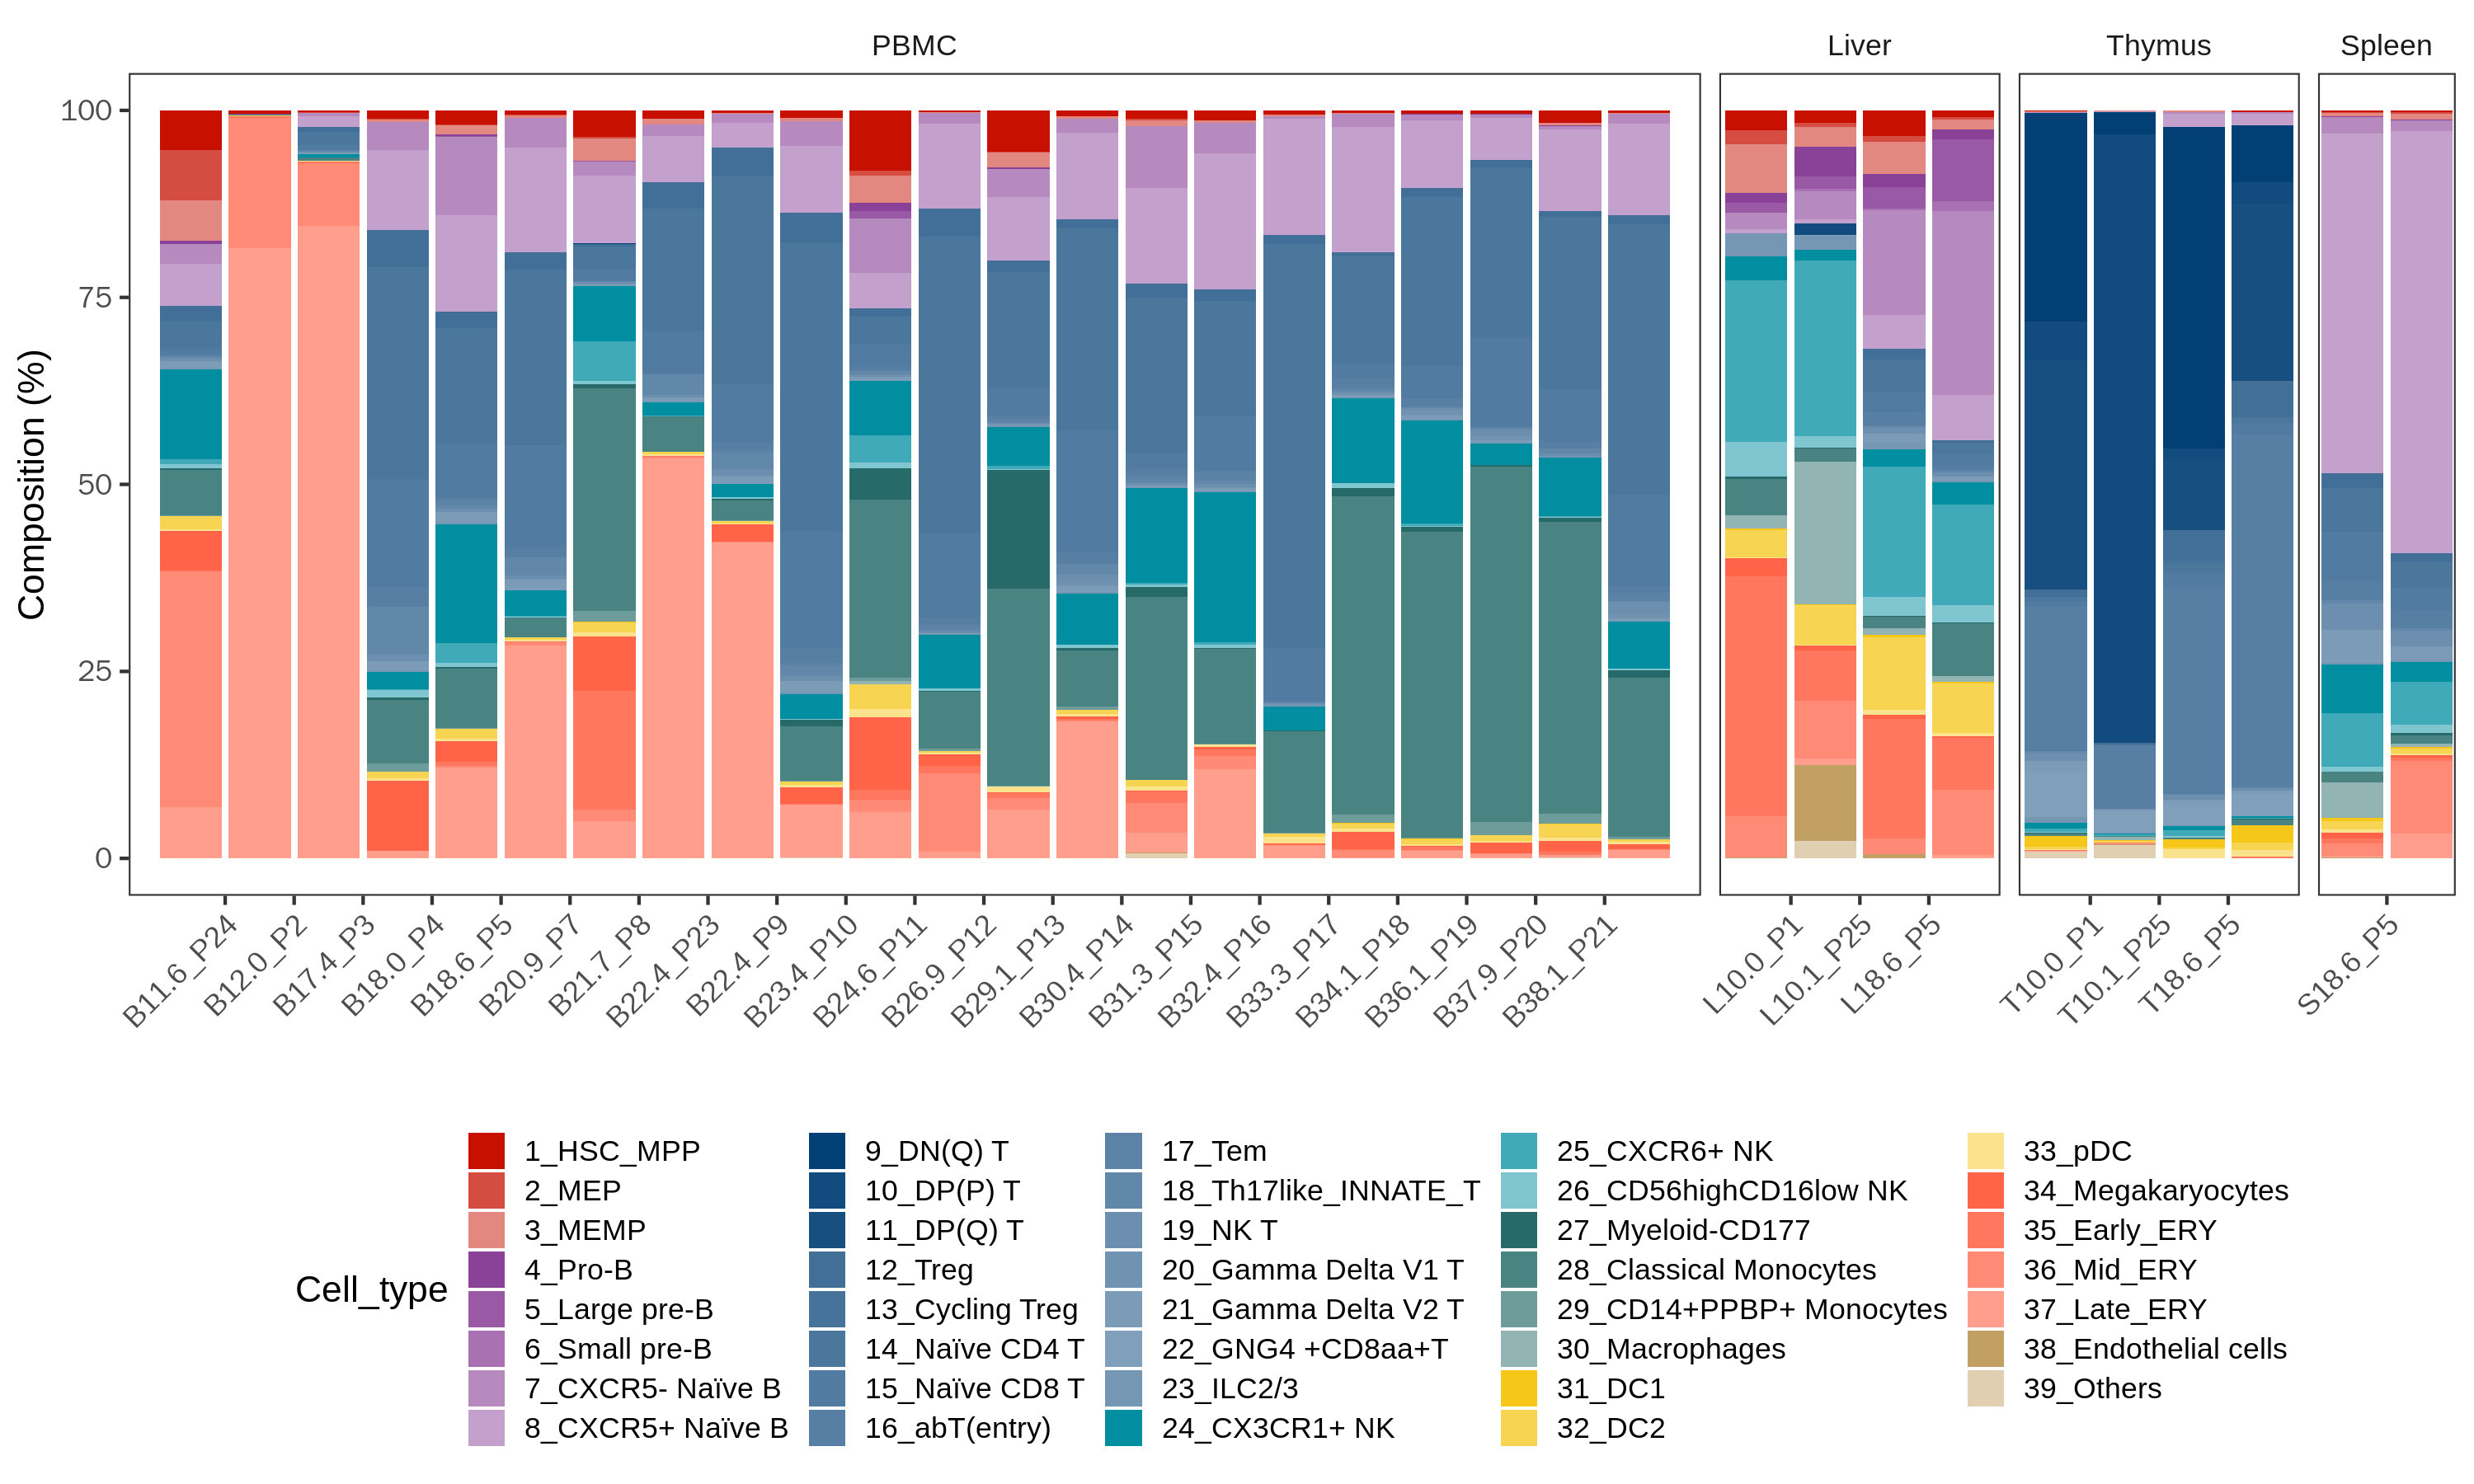

In [25]:
%%R -w 3000 -h 1800 -r 200 -i Oldcell_colors


library(dplyr)
library(ggplot2)


adata1_obs <- read.csv('./All_scanpyData/UmapData//adata1_umap_obsdata.csv')

order(levels(factor(adata1_obs$Last_cell_type_num)))

prefixes <- as.numeric(gsub("_.*$", "", levels(factor(adata1_obs$Last_cell_type_num))))

sorted_indices <- order(prefixes)

sorted_cell_types <- levels(factor(adata1_obs$Last_cell_type_num))[sorted_indices]

print(sorted_cell_types)
grouped_data <-adata1_obs %>%
  group_by( AdjustedID,Last_cell_type_num,new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))%>% mutate(Last_cell_type_num = factor(Last_cell_type_num,levels=sorted_cell_types))



grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))

# Step 1: Calculate new tick positions
# grouped_data$AdjustedID <- as.numeric(grouped_data$AdjustedID)
# new_ticks <- (min(grouped_data$AdjustedID):(max(grouped_data$AdjustedID)-1)) + 0.5


grouped_data$NumericAdjustedID <- as.numeric(as.factor(grouped_data$AdjustedID))

# grouped_data$NumericBody <- as.numeric(as.factor(grouped_data$new_Body))
# # print(grouped_data$NumericBody)
vlines <- 0.5 + seq_len(nlevels(factor(grouped_data$NumericAdjustedID
)))
print(vlines [-c(22,26,30,32)])

P5_all <- ggplot(grouped_data, aes(x = NumericAdjustedID, y = count)) +
  geom_bar(aes(fill = Last_cell_type_num), stat = "identity", position = "fill") +
  facet_grid(. ~ new_Body, space = "free", scales = "free", switch = "y") +
  scale_fill_manual(values = Oldcell_colors) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  scale_x_continuous(breaks =vlines[-c(22,26,28,32)] ,  # Set tick positions for the primary x-axis
                     labels = levels(factor(grouped_data$AdjustedID))[-c(22,26,28,32)],expand=c(0.02,0.01)) +  # Set tick labels for the primary x-axis
  xlab("") + labs(fill="Cell_type")

# breaks = vlines[-c(3,8,26,33,37)],label=levels(resultw2$Last_cell_type_num)[vlines][-c(3,8,26,33,37)],  # Set tick positions between bars
#                     expand=c(0.02,0.01)
# # Add vertical lines
# for (pos in vlines) {
#   P5 <- P5 + geom_vline(xintercept = pos, linetype = "dashed")
# }

# Print the plot
print(P5_all)
ggsave(plot=P5_all,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure1/Figure1E_allpercentage_plot.pdf", width = 16, height = 8)

`summarise()` has grouped output by 'AdjustedID', 'Last_cell_type_num',
'new_Body'. You can override using the `.groups` argument.
[1] "Liver"  "PBMC"   "Spleen" "Thymus"


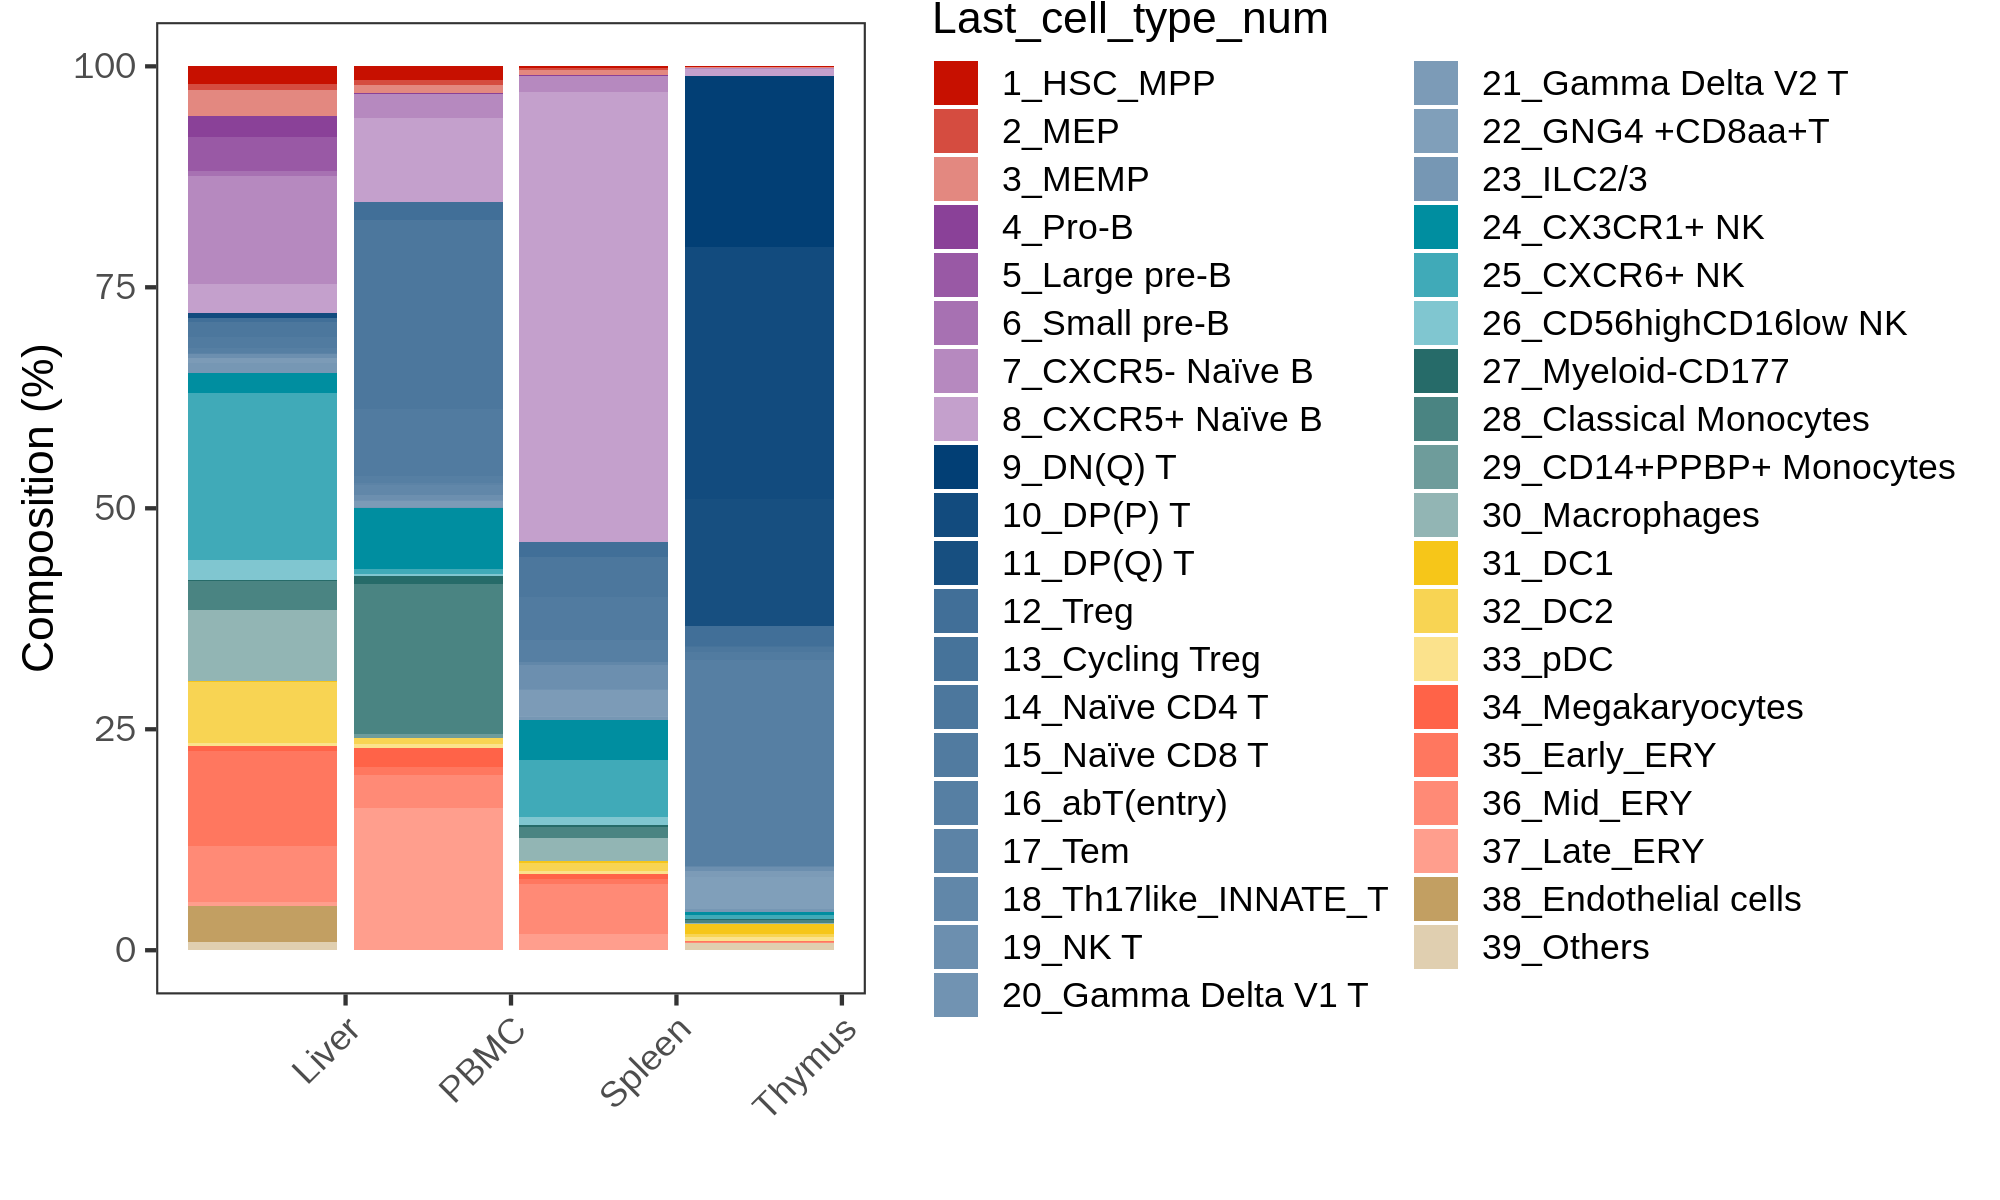

In [26]:
%%R -w 2000 -h 1200 -r 200


library(dplyr)
library(ggplot2)


adata1_obs <- read.csv('./All_scanpyData/UmapData//adata1_umap_obsdata.csv')

order(levels(factor(grouped_data$Last_cell_type_num)))

prefixes <- as.numeric(gsub("_.*$", "", levels(factor(grouped_data$Last_cell_type_num))))


sorted_indices <- order(prefixes)


sorted_cell_types <- levels(factor(grouped_data$Last_cell_type_num))[sorted_indices]

# print(sorted_cell_types)
grouped_data <-adata1_obs %>%
  group_by( AdjustedID,Last_cell_type_num,new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))%>% mutate(Last_cell_type_num = factor(Last_cell_type_num,levels=sorted_cell_types))



grouped_data$NumericBody <- as.numeric(as.factor(grouped_data$new_Body))
# print(grouped_data$NumericBody)
vlines <- 0.5 + seq_len(nlevels(factor(grouped_data$new_Body))) 
# print(vlines)
print(levels(factor(grouped_data$new_Body)))
P5sum <- ggplot(grouped_data, aes(x = NumericBody, y = count)) +
  geom_bar(aes(fill = Last_cell_type_num), stat = "identity", position = "fill") +
  scale_fill_manual(values = Oldcell_colors) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "right") +
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  scale_x_continuous(breaks = vlines,  # Set tick positions between bars
                     labels =levels(factor(grouped_data$new_Body)))+
  xlab("") +
  labs(color="Cell_type")


print(P5sum)
ggsave(plot=P5sum,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S4/S4_sumpercentagemore_plot.pdf", width = 16, height = 8)

In [27]:
%%R -w 3000 -h 1800 -r 200 -i Oldcell_colors


library(dplyr)
library(ggplot2)


adata1_obs <- read.csv('./All_scanpyData/UmapData//adata1_umap_obsdata.csv')

order(levels(factor(adata1_obs$Last_cell_type_num)))

prefixes <- as.numeric(gsub("_.*$", "", levels(factor(adata1_obs$Last_cell_type_num))))

sorted_indices <- order(prefixes)

sorted_cell_types <- levels(factor(adata1_obs$Last_cell_type_num))[sorted_indices]

# print(sorted_cell_types)
grouped_data <-adata1_obs %>%
  group_by( AdjustedID,Last_cell_type_num,new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))%>% mutate(Last_cell_type_num = factor(Last_cell_type_num,levels=sorted_cell_types))


colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")

grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))
grouped_data<-subset(grouped_data,!Cell_lineage=='MK/ERY')
P5_pnlyCD45 <- ggplot(grouped_data, aes(x = AdjustedID, y = count)) +
  geom_bar(aes(fill = Last_cell_type_num), stat = "identity", position = "fill") +
  facet_grid(. ~ new_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_manual(values = Oldcell_colors) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  xlab("")+labs(fill="Cell_type")

P5_pnlyCD45
ggsave(plot=P5_pnlyCD45,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S4/S4_P5_pnlyCD45_percentage.pdf", width = 16, height = 8)

`summarise()` has grouped output by 'AdjustedID', 'Last_cell_type_num',
'new_Body'. You can override using the `.groups` argument.


In [28]:
%%R
grouped_data

# A tibble: 842 × 6
# Groups:   AdjustedID, Last_cell_type_num, new_Body [842]
   AdjustedID Last_cell_type_num   new_Body Cell_lineage count percentage
   <chr>      <fct>                <fct>    <fct>        <int>      <dbl>
 1 B11.6_P24  12_Treg              PBMC     T/ILC          247        100
 2 B11.6_P24  13_Cycling Treg      PBMC     T/ILC           13        100
 3 B11.6_P24  14_Naïve CD4 T       PBMC     T/ILC          444        100
 4 B11.6_P24  15_Naïve CD8 T       PBMC     T/ILC           96        100
 5 B11.6_P24  16_abT(entry)        PBMC     T/ILC           31        100
 6 B11.6_P24  18_Th17like_INNATE_T PBMC     T/ILC           21        100
 7 B11.6_P24  19_NK T              PBMC     T/ILC           58        100
 8 B11.6_P24  1_HSC_MPP            PBMC     PRECURSOR      655        100
 9 B11.6_P24  21_Gamma Delta V2 T  PBMC     T/ILC          114        100
10 B11.6_P24  22_GNG4 +CD8aa+T     PBMC     T/ILC            1        100
# ℹ 832 more rows
# ℹ Use `print(

In [29]:
%%R -w 1800 -h 2600 -r 180
# 加载jsonlite库
library(jsonlite)

# 读取JSON文件
file_path <- "./All_scanpyData/ColorDict/Celltype_colors_dict.json"
colors_dict <- fromJSON(file_path)
colors_dict

$`7_CXCR5- Naïve B`
[1] "#C71000FF"

$`37_Late_ERY`
[1] "#008EA0FF"

$`36_Mid_ERY`
[1] "#8A4198FF"

$`12_Treg`
[1] "#5A9599FF"

$`8_CXCR5+ Naïve B`
[1] "#FF6348FF"

$`18_Th17like_INNATE_T`
[1] "#84D7E1FF"

$`14_Naïve CD4 T`
[1] "#FF95A8FF"

$`2_MEP`
[1] "#3D3B25FF"

$`34_Megakaryocytes`
[1] "#ADE2D0FF"

$`15_Naïve CD8 T`
[1] "#1A5354FF"

$`21_Gamma Delta V2 T`
[1] "#3F4041FF"

$`35_Early_ERY`
[1] "#fa6e01"

$`26_CD56highCD16low NK`
[1] "#972b1d"

$`24_CX3CR1+ NK`
[1] "#e6a84b"

$`19_NK T`
[1] "#4c211b"

$`23_ILC2/3`
[1] "#ff717f"

$`32_DC2`
[1] "#009966"

$`28_Classical Monocytes`
[1] "#c62d17"

$`3_MEMP`
[1] "#023f75"

$`1_HSC_MPP`
[1] "#ea894e"

$`33_pDC`
[1] "#266b69"

$`27_Myeloid-CD177`
[1] "#eb4601"

$`17_Tem`
[1] "#f6c619"

$`4_Pro-B`
[1] "#f49128"

$`16_abT(entry)`
[1] "#194a55"

$`39_Others`
[1] "#c29f62"

$`25_CXCR6+ NK`
[1] "#83ba9e"

$`29_CD14+PPBP+ Monocytes`
[1] "#187c65"

$`22_GNG4 +CD8aa+T`
[1] "#A6CEE3"

$`5_Large pre-B`
[1] "#223e9c"

$`20_Gamma Delta V1 T`
[1] "#aebe

In [30]:
%%R -w 800 -h 600 -r 150
colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966",
"#D2E8FC","#73DED9","#5B3FEE","#5682ED","#12C44B","#D064F7","#92CFC2","#FF8884","#BBB8D9","#C8C76A","#DDC2CE","#5491CF","#F6CAD3","#66D8CD",
         "#AB473E", "#E6BE6A"   
            )

grouped_data <- adata1_obs %>%
  group_by(Last_cell_type, new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))



grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))


grouped_data$NumericBody <- as.numeric(as.factor(grouped_data$new_Body))

vlines <- 0.5 + seq_len(nlevels(factor(grouped_data$new_Body))) 
P4_3=ggplot(grouped_data, aes(x = NumericBody, y = count)) +
  geom_bar(aes(fill = Cell_lineage), stat = "identity") + scale_fill_manual(values=
                                                                            c(
  "PRECURSOR"="#C71000FF",
  "B_CELL"="#8A4198FF",


  "T/ILC"="#023f75",
  "NK"= "#008EA0FF" ,
  "MYELOID"= "#266b69",
  "DC"="#edae11",
  "MK/ERY"= "#FF6348FF",
  'OTHERS'="#c29f62"))+

 
  theme_bw(base_size = 16) +

  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+scale_x_continuous(breaks = vlines,  # Set tick positions between bars
                     labels =levels(factor(grouped_data$new_Body)))

P4_3
ggsave(plot=P4_3,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S4/S4_Pall_count.pdf", width = 16, height = 8)

`summarise()` has grouped output by 'Last_cell_type', 'new_Body'. You can
override using the `.groups` argument.


 [1] "1_HSC_MPP"               "2_MEP"                  
 [3] "3_MEMP"                  "4_Pro-B"                
 [5] "5_Large pre-B"           "6_Small pre-B"          
 [7] "7_CXCR5- Naïve B"        "8_CXCR5+ Naïve B"       
 [9] "9_DN(Q) T"               "10_DP(P) T"             
[11] "11_DP(Q) T"              "12_Treg"                
[13] "13_Cycling Treg"         "14_Naïve CD4 T"         
[15] "15_Naïve CD8 T"          "16_abT(entry)"          
[17] "17_Tem"                  "18_Th17like_INNATE_T"   
[19] "19_NK T"                 "20_Gamma Delta V1 T"    
[21] "21_Gamma Delta V2 T"     "22_GNG4 +CD8aa+T"       
[23] "23_ILC2/3"               "24_CX3CR1+ NK"          
[25] "25_CXCR6+ NK"            "26_CD56highCD16low NK"  
[27] "27_Myeloid-CD177"        "28_Classical Monocytes" 
[29] "29_CD14+PPBP+ Monocytes" "30_Macrophages"         
[31] "31_DC1"                  "32_DC2"                 
[33] "33_pDC"                  "34_Megakaryocytes"      
[35] "35_Early_ERY"            

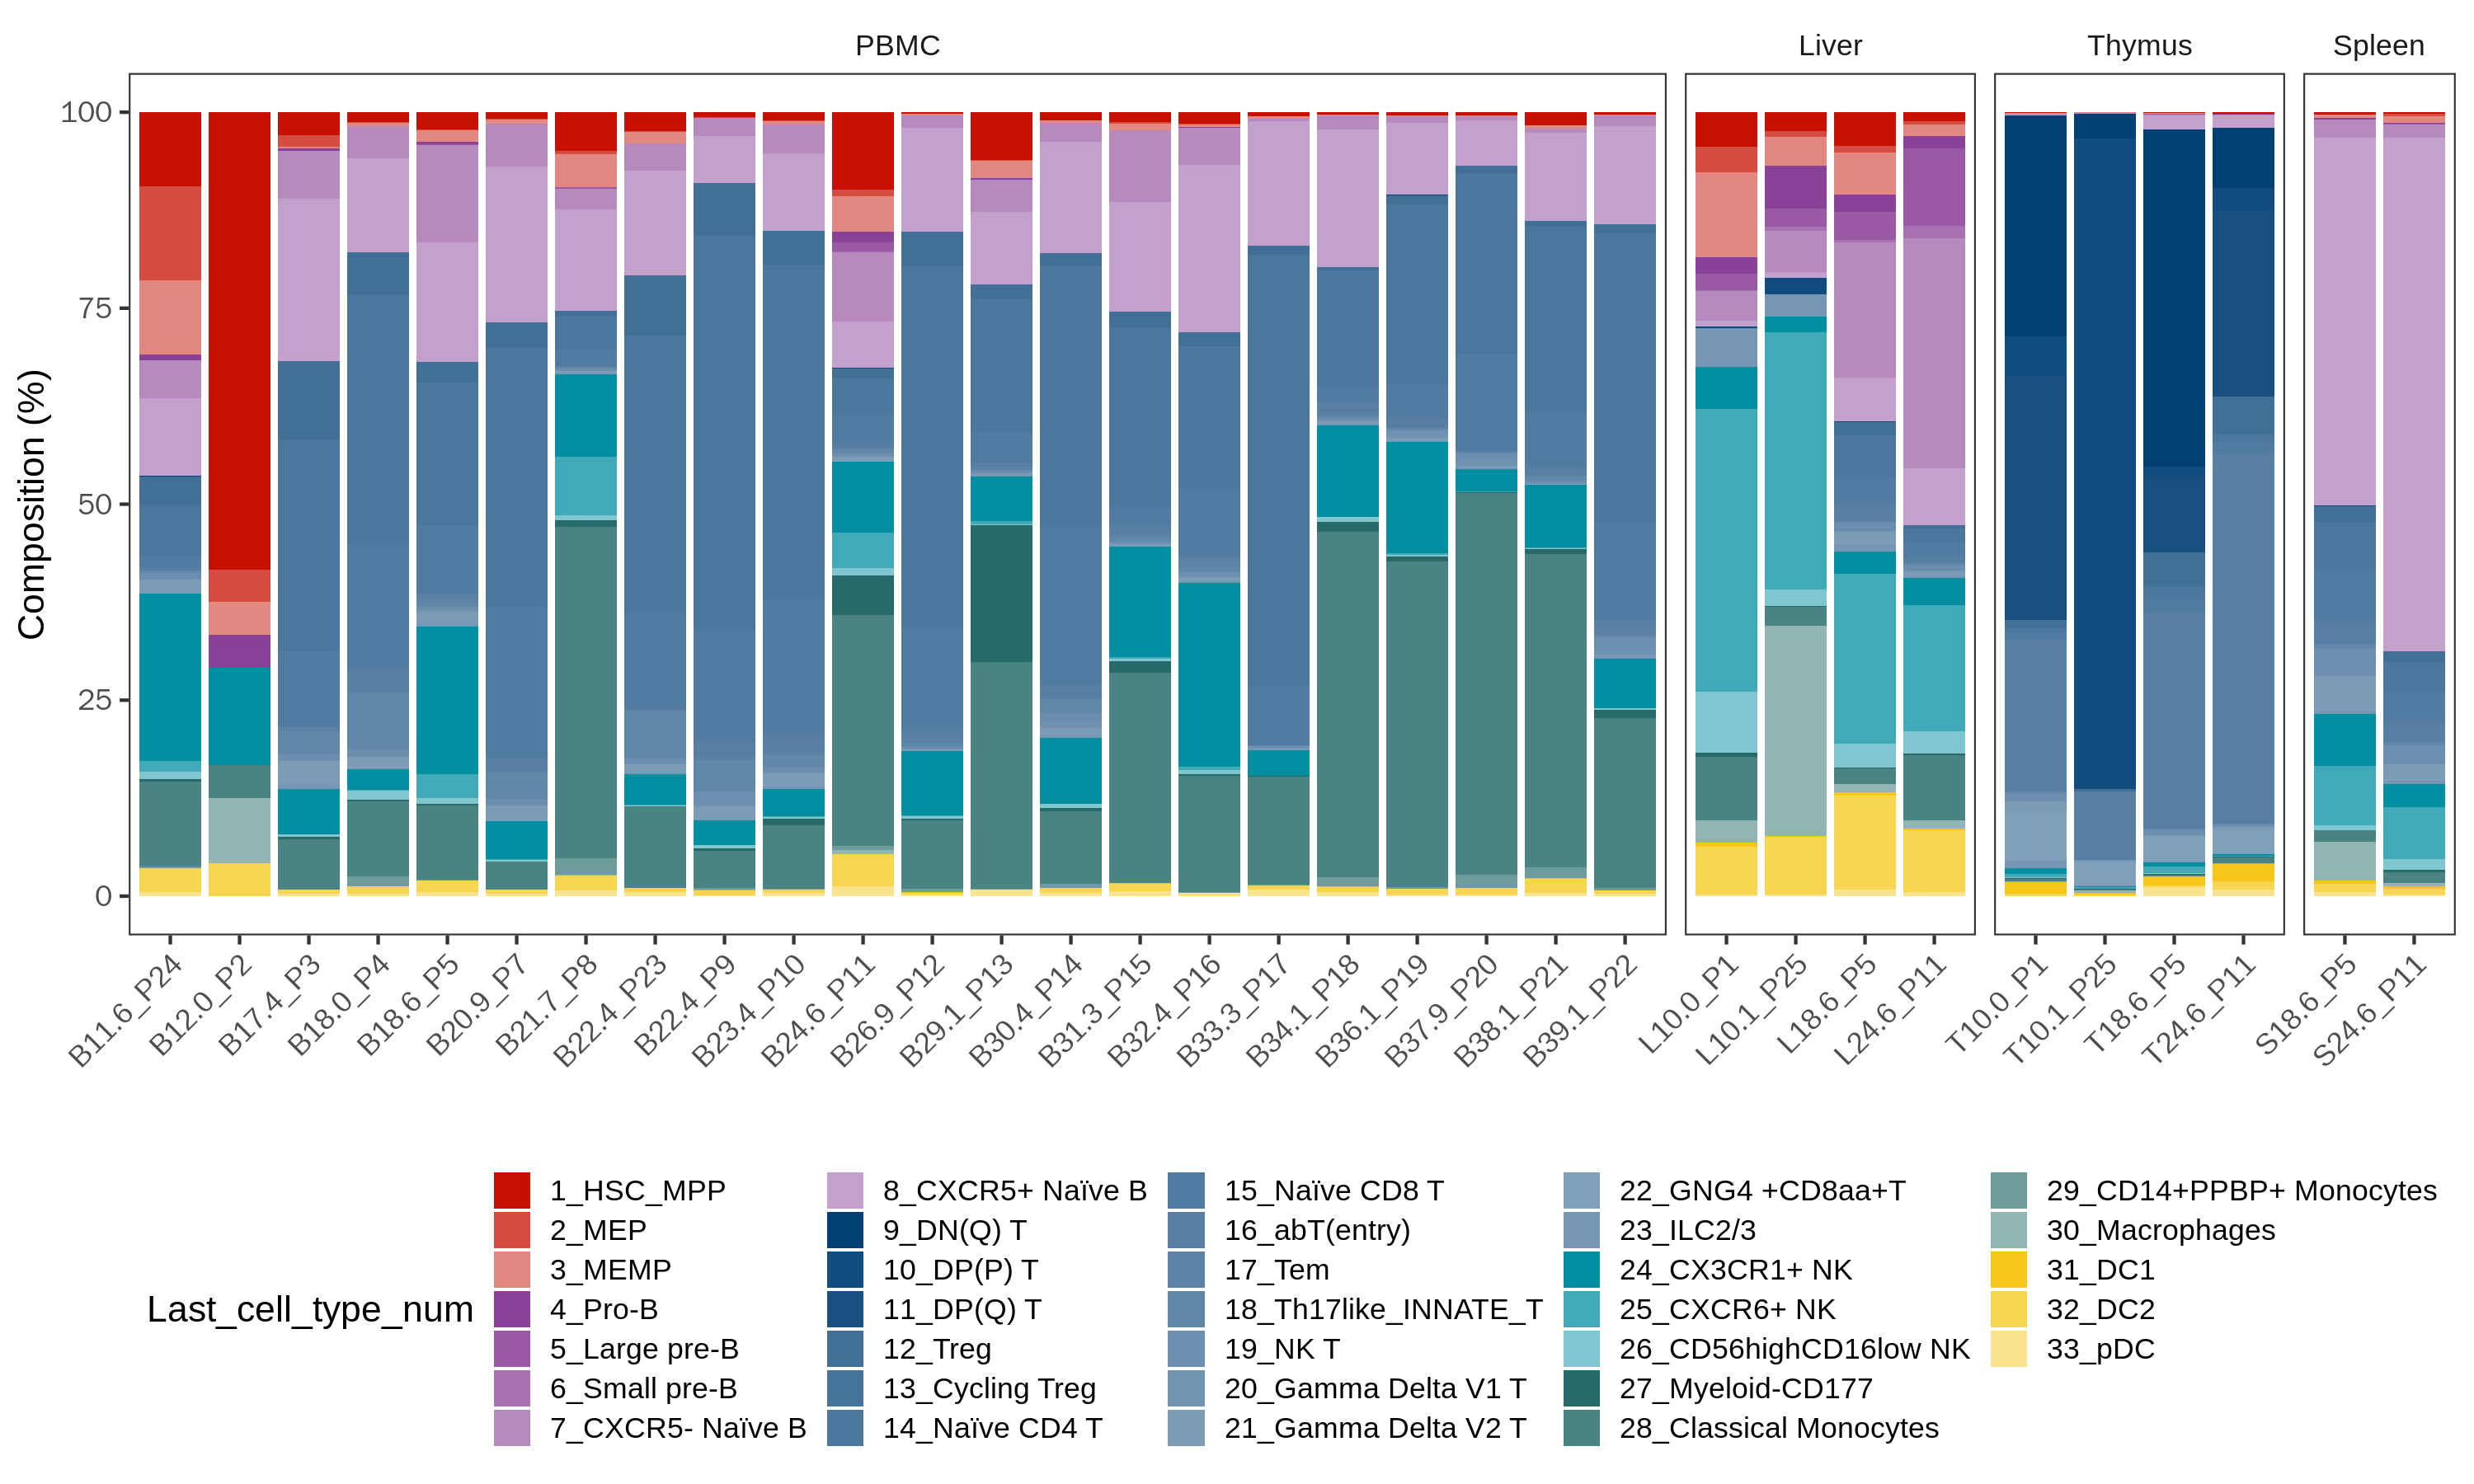

In [31]:
%%R -w 3000 -h 1800 -r 200 -i Oldcell_colors


library(dplyr)
library(ggplot2)


adata1_obs <- read.csv('./All_scanpyData/UmapData//adata1_umap_obsdata.csv')



prefixes <- as.numeric(gsub("_.*$", "", levels(factor(adata1_obs$Last_cell_type_num))))

sorted_indices <- order(prefixes)

sorted_cell_types <- levels(factor(adata1_obs$Last_cell_type_num))[sorted_indices]

print(sorted_cell_types)
grouped_data <-adata1_obs %>%
  group_by( AdjustedID,Last_cell_type_num,new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))%>% mutate(Last_cell_type_num = factor(Last_cell_type_num,levels=sorted_cell_types))


colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966","#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333")

grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))


grouped_data<-subset(grouped_data,!Cell_lineage=='MK/ERY')
grouped_data<-subset(grouped_data,!Cell_lineage=='OTHERS')
P5 <- ggplot(grouped_data, aes(x = AdjustedID, y = count)) +
  geom_bar(aes(fill = Last_cell_type_num), stat = "identity", position = "fill") +
  facet_grid(. ~ new_Body, space = "free", scales = "free", switch = "y") +
      scale_fill_manual(values = Oldcell_colors) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank(),
        legend.position = "bottom") +  
  ylab("Composition (%)") +
  scale_y_continuous(labels = seq(0, 100, by = 25)) +
  xlab("")+labs(color="Cell_type")

P5

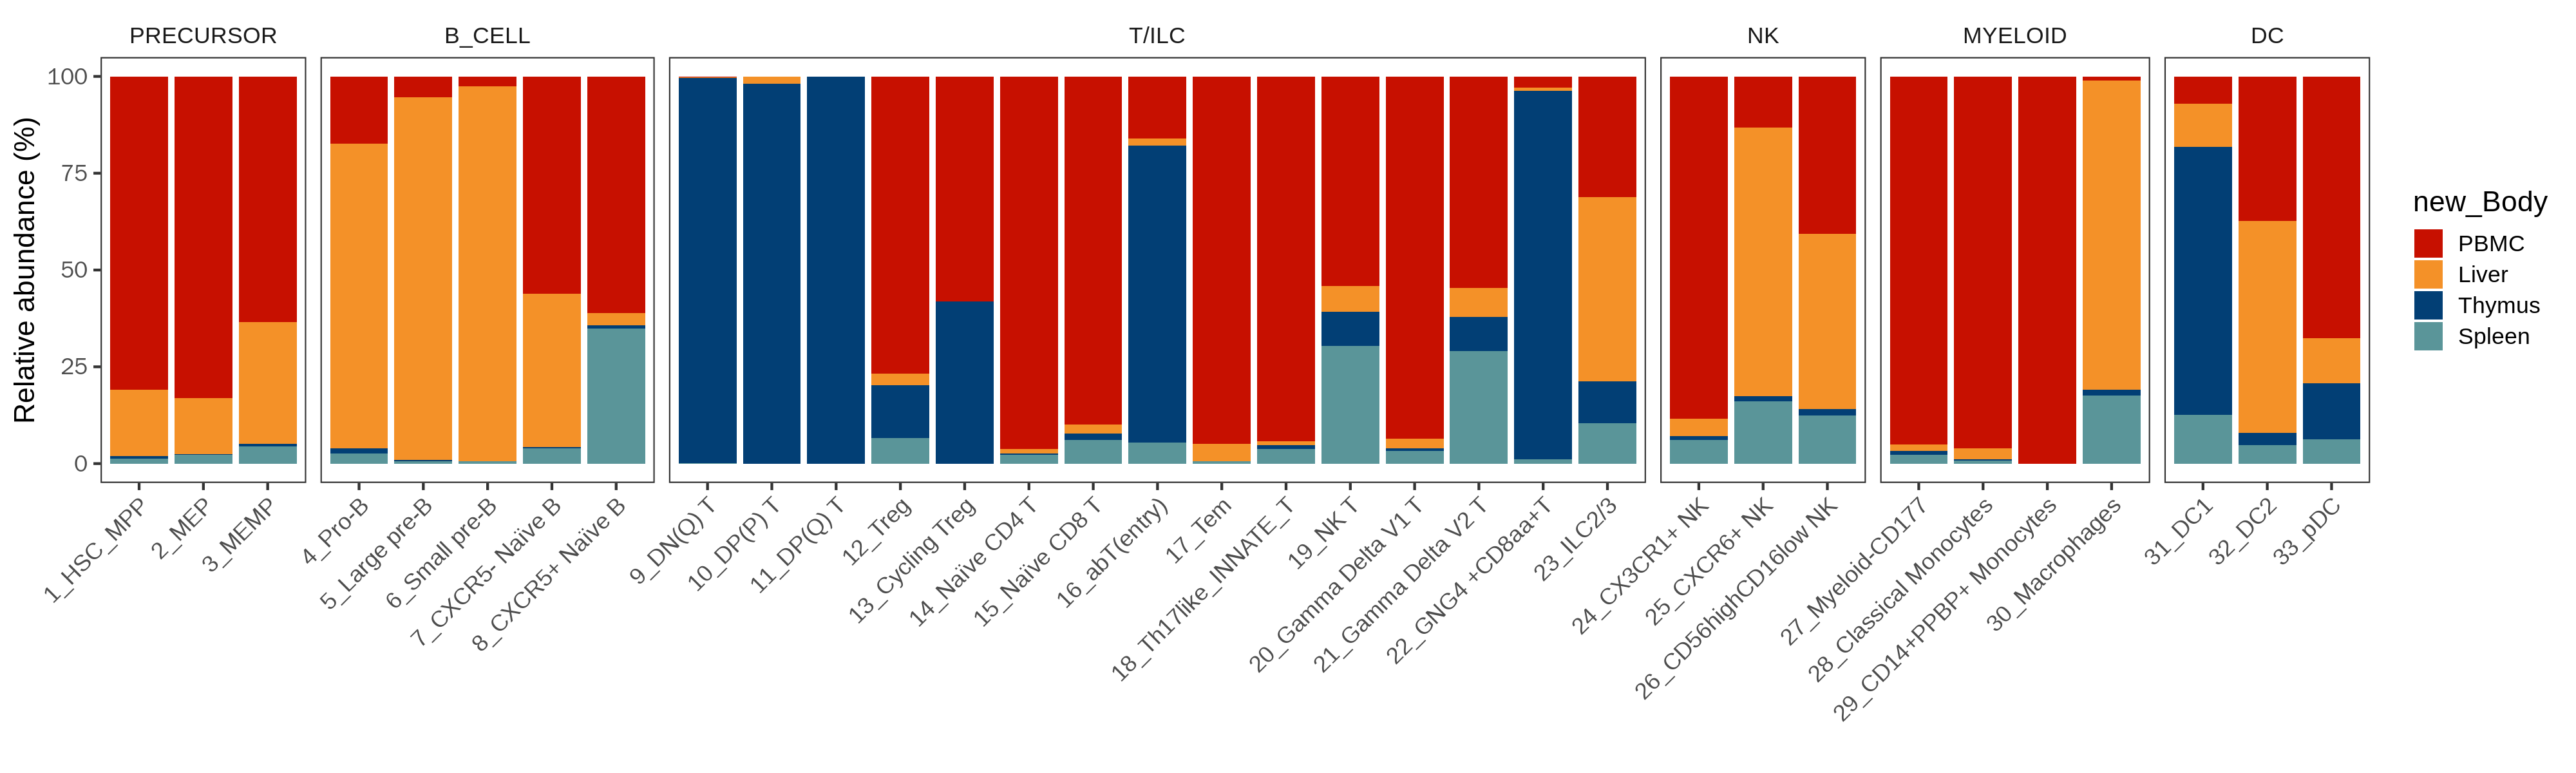

In [32]:
%%R -w 4000 -h 1200 -r 200
colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966")

grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))

grouped_data$NumericBody <- as.numeric(as.factor(grouped_data$new_Body))


vlines <- 0.5 + seq_len(nlevels(factor(grouped_data$new_Body))) 

ggplot(grouped_data, aes(x = Last_cell_type_num, y = count)) +
  geom_bar(aes(fill = new_Body), stat = "identity", position = "fill") +
  facet_grid(. ~ Cell_lineage, space = "free", scales = "free", switch = "y") +
#   scale_fill_manual(values= c("#F6313E","#fb862b","#0eb0c8","#6a73cf"))+ 
scale_fill_manual(values= c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Relative abundance (%)")  +scale_y_continuous(labels=seq(0,100, by=25)) +xlab("")
# ggsave("../All_scanpydata/Scanpy_Subdata/Figuremerge/Body_distribution2.pdf", height = 6, width = 20)


In [33]:
pwd

'/data5/maolp/Gaofeng_All_matrix/Allcount'

`summarise()` has grouped output by 'Last_cell_type', 'new_Body'. You can
override using the `.groups` argument.
  [1] 1 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 1 3 2 1 4 3 2 1 4 3 2 1
 [38] 4 3 2 1 4 3 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1
 [75] 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4
[112] 3 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 2 1 4 2 1 4 3 2 1 4 3 2 1 4 3 2 1 4 3
Saving 5 x 4 in image


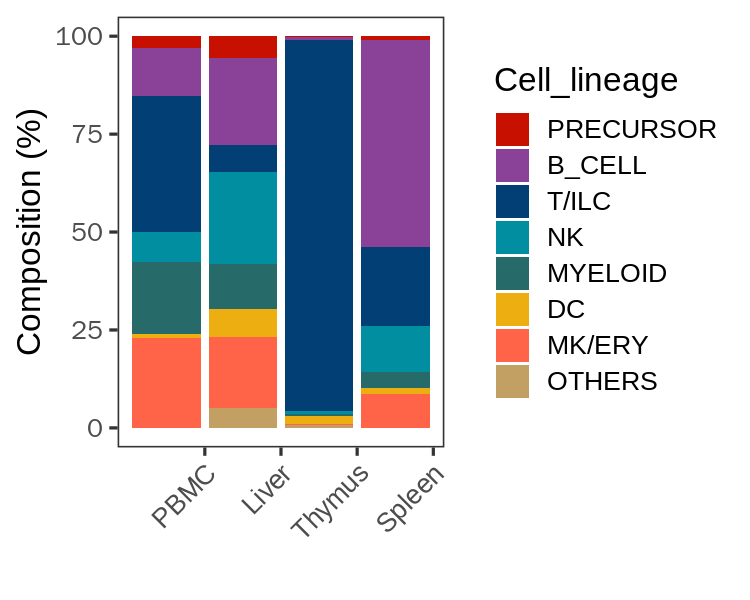

In [34]:
%%R -w 750 -h 600 -r 150
colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966",
"#D2E8FC","#73DED9","#5B3FEE","#5682ED","#12C44B","#D064F7","#92CFC2","#FF8884","#BBB8D9","#C8C76A","#DDC2CE","#5491CF","#F6CAD3","#66D8CD",
         "#AB473E", "#E6BE6A"   
            )

grouped_data <- adata1_obs %>%
  group_by(Last_cell_type,  new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))
grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))

grouped_data$NumericBody <- as.numeric(as.factor(grouped_data$new_Body))
print(grouped_data$NumericBody )
vlines <- 0.5 + seq_len(nlevels(factor(grouped_data$new_Body))) 

P4_2=ggplot(grouped_data, aes(x = NumericBody, y = count)) +
  geom_bar(aes(fill = Cell_lineage), stat = "identity", position = "fill") + 
scale_fill_manual(values=
   c(  "PRECURSOR"="#C71000FF",
  "B_CELL"="#8A4198FF",


  "T/ILC"="#023f75",
  "NK"= "#008EA0FF" ,
  "MYELOID"= "#266b69",
  "DC"="#edae11",
  "MK/ERY"= "#FF6348FF",
  'OTHERS'="#c29f62"))+

 
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Composition (%)")  +
scale_x_continuous(breaks = vlines,  # Set tick positions between bars
                     labels =levels(factor(grouped_data$new_Body)))+xlab("")+scale_y_continuous(labels=seq(0,100, by=25)) +xlab("")
ggsave(plot=P4_2,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure1/Figure1G_sumpercentage_plot.pdf", width = 5, height = )
P4_2


`summarise()` has grouped output by 'Last_cell_type', 'new_Body'. You can
override using the `.groups` argument.


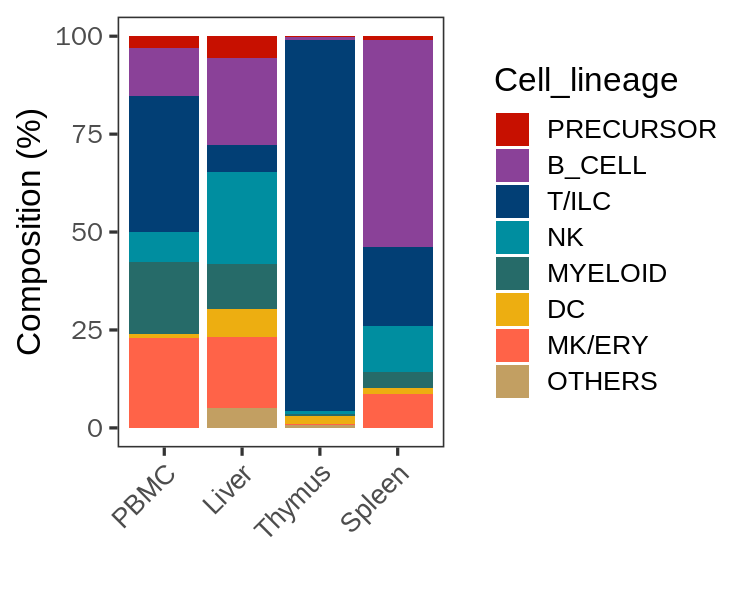

In [35]:
%%R -w 750 -h 600 -r 150
colorname2=c("#46A040" ,"#00AF99", "#FFC179" ,"#98D9E9" ,"#F6313E", "#FFA300", "#333366", "#FF5A00", "#663366","#FF6666",
"#8F1336", "#0081C9", "#001588", "#CC0033","#CC9966","#CC0033","#999933","#009966","#CCCC33","#CCFF99","#333399","#993333",
"#490C65", "#BA7FD0","#A6CEE3", "#1F78B4", "#DE77AE", "#B2DF8A", "#006D2C", "#868686", "#B5AD64","#9DA8E2","#91C392","#FF9900","#339966",
"#D2E8FC","#73DED9","#5B3FEE","#5682ED","#12C44B","#D064F7","#92CFC2","#FF8884","#BBB8D9","#C8C76A","#DDC2CE","#5491CF","#F6CAD3","#66D8CD",
         "#AB473E", "#E6BE6A"   
            )

grouped_data <- adata1_obs %>%
  group_by(Last_cell_type,  new_Body, Cell_lineage) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100) %>%
  mutate(Cell_lineage = factor(Cell_lineage))
grouped_data$new_Body<-factor(grouped_data$new_Body,level=c('PBMC','Liver','Thymus','Spleen'))
grouped_data$Cell_lineage<-factor(grouped_data$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))
P4_2=ggplot(grouped_data, aes(x = new_Body, y = count)) +
  geom_bar(aes(fill = Cell_lineage), stat = "identity", position = "fill") + 
scale_fill_manual(values=
   c(  "PRECURSOR"="#C71000FF",
  "B_CELL"="#8A4198FF",


  "T/ILC"="#023f75",
  "NK"= "#008EA0FF" ,
  "MYELOID"= "#266b69",
  "DC"="#edae11",
  "MK/ERY"= "#FF6348FF",
  'OTHERS'="#c29f62"))+
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Composition (%)")  +scale_y_continuous(labels=seq(0,100, by=25)) +xlab("")


ggsave(plot=P4_2,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure1/Figure1G_sumpercentage_plot_v2.pdf", width = 5, height = 5)
P4_2

In [36]:
%%R -w 3000 -h 1200 -r 150
library(dplyr)
library(tidyr)

process_grouped_data <- function(adata1_obs) {
  grouped_data <- adata1_obs %>%
    group_by(AdjustedID, Last_cell_type_num, Cell_lineage) %>%
    summarise(count = n()) %>%
    group_by(AdjustedID) %>%
    mutate(week_total = sum(count))

  grouped_data <- grouped_data %>%
    separate(AdjustedID, into = c("Part1", "Part2"), sep = "\\.", remove = FALSE)

  grouped_data <- grouped_data %>%
    separate(Part1, into = c("Body", "Week"), sep = "(?<=\\D)(?=\\d)", remove = FALSE) %>%
    mutate(percentage = count / week_total)

  grouped_data <- grouped_data %>%
    mutate(week_number = row_number())

  adjustedID_levels <- unique(grouped_data$AdjustedID)
  adjustedID_mapping <- setNames(1:length(adjustedID_levels), adjustedID_levels)

  grouped_data <- grouped_data %>%
    mutate(AdjustedID_numeric = sapply(AdjustedID, function(x) adjustedID_mapping[x]))

  grouped_data <- grouped_data %>%
    mutate(AdjustedID_letter = substr(AdjustedID, 1, 1)) %>%
    group_by(AdjustedID_letter) %>%
    mutate(AdjustedID_numeric = match(AdjustedID, unique(AdjustedID))) %>%
    ungroup()

  return(grouped_data)
}
# grouped_dataB <- subset(adata1_obs, new_Body == "Blood_PBMC")
                                 
grouped_data_result <- process_grouped_data(adata1_obs)
print(grouped_data_result[, 1:6])
                                       
print(grouped_data_result[, 7:12])
library(dplyr)


result <- grouped_data_result  %>%
  group_by(AdjustedID) %>%
  summarise(sum_percentage = sum(percentage))

print(table(result$sum_percentage))
                                       
                         
# grouped_dataB <- subset(grouped_data_result, Body == "B" & Last_cell_type_num =="45_Mid_ERY")
# max(grouped_dataB$percentage)*100                                       

`summarise()` has grouped output by 'AdjustedID', 'Last_cell_type_num'. You can
override using the `.groups` argument.
# A tibble: 961 × 6
   AdjustedID Part1 Body  Week  Part2 Last_cell_type_num  
   <chr>      <chr> <chr> <chr> <chr> <chr>               
 1 B11.6_P24  B11   B     11    6_P24 12_Treg             
 2 B11.6_P24  B11   B     11    6_P24 13_Cycling Treg     
 3 B11.6_P24  B11   B     11    6_P24 14_Naïve CD4 T      
 4 B11.6_P24  B11   B     11    6_P24 15_Naïve CD8 T      
 5 B11.6_P24  B11   B     11    6_P24 16_abT(entry)       
 6 B11.6_P24  B11   B     11    6_P24 18_Th17like_INNATE_T
 7 B11.6_P24  B11   B     11    6_P24 19_NK T             
 8 B11.6_P24  B11   B     11    6_P24 1_HSC_MPP           
 9 B11.6_P24  B11   B     11    6_P24 21_Gamma Delta V2 T 
10 B11.6_P24  B11   B     11    6_P24 22_GNG4 +CD8aa+T    
# ℹ 951 more rows
# ℹ Use `print(n = ...)` to see more rows
# A tibble: 961 × 6
   Cell_lineage count week_total percentage week_number AdjustedID_numeri

In [37]:
%%R -w 3000 -h 1200 -r 150  

grouped_data_result <- process_grouped_data(adata1_obs)
prefixes <- as.numeric(gsub("_.*$", "", levels(factor(adata1_obs$Last_cell_type_num))))

sorted_indices <- order(prefixes)

sorted_cell_types <- levels(factor(adata1_obs$Last_cell_type_num))[sorted_indices]

print(grouped_data_result[, 1:6])
                                       
print(grouped_data_result[, 7:12])
grouped_data_result$Last_cell_type_num<-factor(grouped_data_result$Last_cell_type_num,level=sorted_cell_types )
grouped_data_result$Cell_lineage<-factor(grouped_data_result$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))
grouped_data_result$Body<-factor(grouped_data_result$Body,level=c('B','L','T','S'))


`summarise()` has grouped output by 'AdjustedID', 'Last_cell_type_num'. You can
override using the `.groups` argument.
# A tibble: 961 × 6
   AdjustedID Part1 Body  Week  Part2 Last_cell_type_num  
   <chr>      <chr> <chr> <chr> <chr> <chr>               
 1 B11.6_P24  B11   B     11    6_P24 12_Treg             
 2 B11.6_P24  B11   B     11    6_P24 13_Cycling Treg     
 3 B11.6_P24  B11   B     11    6_P24 14_Naïve CD4 T      
 4 B11.6_P24  B11   B     11    6_P24 15_Naïve CD8 T      
 5 B11.6_P24  B11   B     11    6_P24 16_abT(entry)       
 6 B11.6_P24  B11   B     11    6_P24 18_Th17like_INNATE_T
 7 B11.6_P24  B11   B     11    6_P24 19_NK T             
 8 B11.6_P24  B11   B     11    6_P24 1_HSC_MPP           
 9 B11.6_P24  B11   B     11    6_P24 21_Gamma Delta V2 T 
10 B11.6_P24  B11   B     11    6_P24 22_GNG4 +CD8aa+T    
# ℹ 951 more rows
# ℹ Use `print(n = ...)` to see more rows
# A tibble: 961 × 6
   Cell_lineage count week_total percentage week_number AdjustedID_numeri

In [38]:
%%R
levels(factor(grouped_data_result$Last_cell_type_num))

 [1] "1_HSC_MPP"               "2_MEP"                  
 [3] "3_MEMP"                  "4_Pro-B"                
 [5] "5_Large pre-B"           "6_Small pre-B"          
 [7] "7_CXCR5- Naïve B"        "8_CXCR5+ Naïve B"       
 [9] "9_DN(Q) T"               "10_DP(P) T"             
[11] "11_DP(Q) T"              "12_Treg"                
[13] "13_Cycling Treg"         "14_Naïve CD4 T"         
[15] "15_Naïve CD8 T"          "16_abT(entry)"          
[17] "17_Tem"                  "18_Th17like_INNATE_T"   
[19] "19_NK T"                 "20_Gamma Delta V1 T"    
[21] "21_Gamma Delta V2 T"     "22_GNG4 +CD8aa+T"       
[23] "23_ILC2/3"               "24_CX3CR1+ NK"          
[25] "25_CXCR6+ NK"            "26_CD56highCD16low NK"  
[27] "27_Myeloid-CD177"        "28_Classical Monocytes" 
[29] "29_CD14+PPBP+ Monocytes" "30_Macrophages"         
[31] "31_DC1"                  "32_DC2"                 
[33] "33_pDC"                  "34_Megakaryocytes"      
[35] "35_Early_ERY"            

In [39]:
%%R
length(unique(grouped_data_result$week_total))

[1] 32


In [40]:
%%R
library(dplyr)


resultw <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num ,Cell_lineage) %>%
  summarise(WeightedAverage = weighted.mean(percentage, week_total))

# 查看结果
print(resultw)

`summarise()` has grouped output by 'Body', 'Last_cell_type_num'. You can
override using the `.groups` argument.
# A tibble: 146 × 4
# Groups:   Body, Last_cell_type_num [146]
   Body  Last_cell_type_num Cell_lineage WeightedAverage
   <fct> <fct>              <fct>                  <dbl>
 1 B     1_HSC_MPP          PRECURSOR           0.0152  
 2 B     2_MEP              PRECURSOR           0.00641 
 3 B     3_MEMP             PRECURSOR           0.00931 
 4 B     4_Pro-B            B_CELL              0.00118 
 5 B     5_Large pre-B      B_CELL              0.000993
 6 B     6_Small pre-B      B_CELL              0.000300
 7 B     7_CXCR5- Naïve B   B_CELL              0.0278  
 8 B     8_CXCR5+ Naïve B   B_CELL              0.0967  
 9 B     9_DN(Q) T          T/ILC               0.000333
10 B     10_DP(P) T         T/ILC               0.000245
# ℹ 136 more rows
# ℹ Use `print(n = ...)` to see more rows


In [41]:
%%R -w 3600 -h 1500 -r 200
library(ggplot2)
resultw2 <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num) %>%
  mutate(WeightedAverage = mean(percentage)) %>%
  ungroup()

In [42]:
%%R
resultw2

# A tibble: 961 × 14
   AdjustedID Part1 Body  Week  Part2 Last_cell_type_num   Cell_lineage count
   <chr>      <chr> <fct> <chr> <chr> <fct>                <fct>        <int>
 1 B11.6_P24  B11   B     11    6_P24 12_Treg              T/ILC          247
 2 B11.6_P24  B11   B     11    6_P24 13_Cycling Treg      T/ILC           13
 3 B11.6_P24  B11   B     11    6_P24 14_Naïve CD4 T       T/ILC          444
 4 B11.6_P24  B11   B     11    6_P24 15_Naïve CD8 T       T/ILC           96
 5 B11.6_P24  B11   B     11    6_P24 16_abT(entry)        T/ILC           31
 6 B11.6_P24  B11   B     11    6_P24 18_Th17like_INNATE_T T/ILC           21
 7 B11.6_P24  B11   B     11    6_P24 19_NK T              T/ILC           58
 8 B11.6_P24  B11   B     11    6_P24 1_HSC_MPP            PRECURSOR      655
 9 B11.6_P24  B11   B     11    6_P24 21_Gamma Delta V2 T  T/ILC          114
10 B11.6_P24  B11   B     11    6_P24 22_GNG4 +CD8aa+T     T/ILC            1
# ℹ 951 more rows
# ℹ 6 more variables: wee

`summarise()` has grouped output by 'Body', 'Last_cell_type_num'. You can
override using the `.groups` argument.


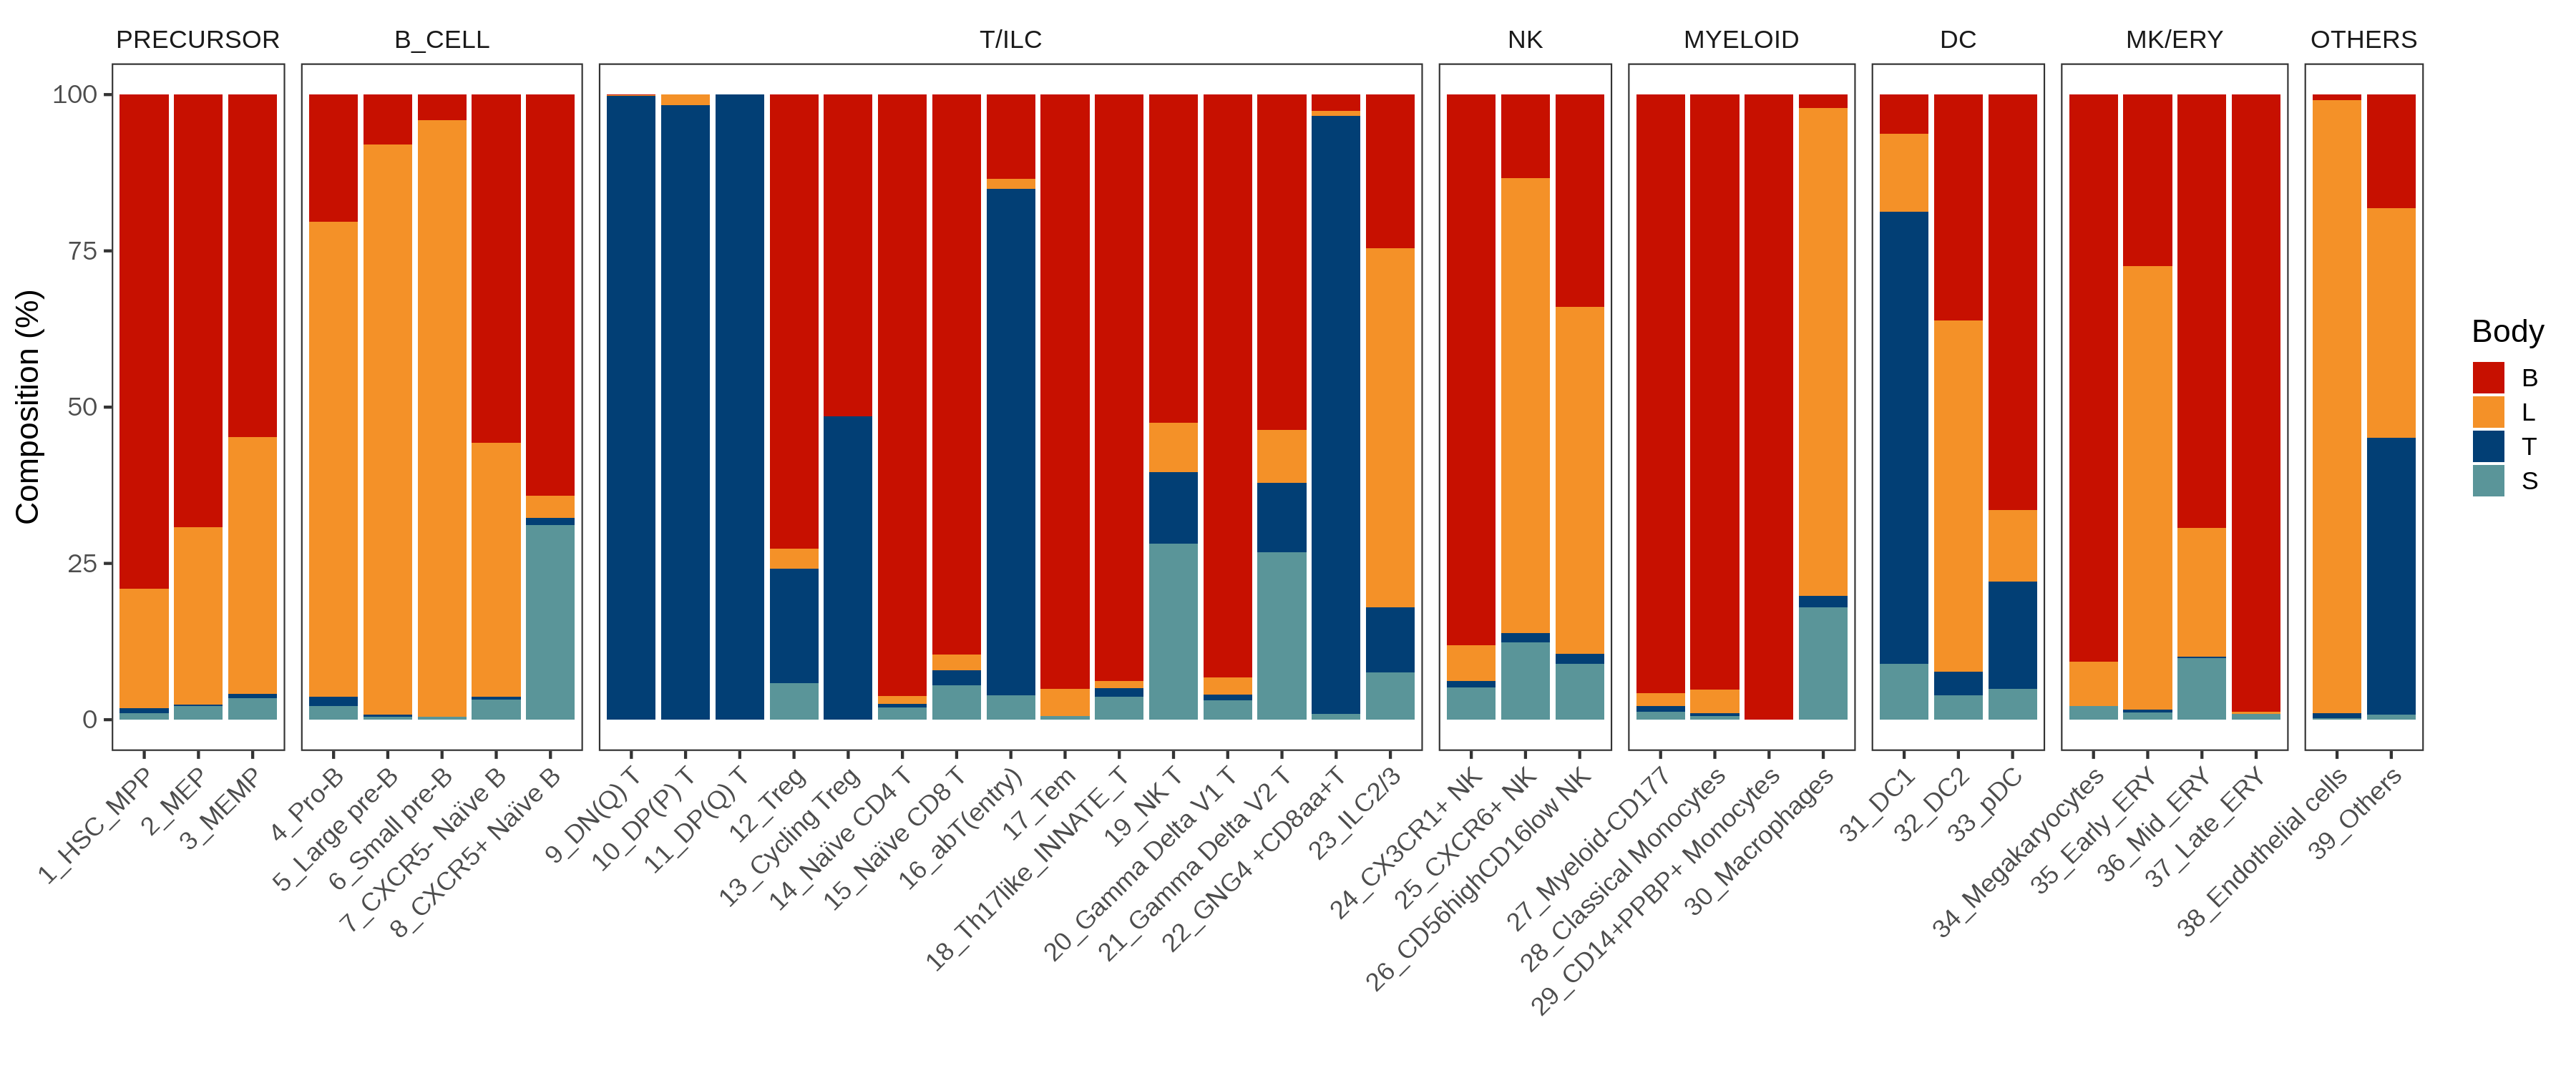

In [43]:
%%R -w 3600 -h 1500 -r 200
library(ggplot2)
resultw <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num ,Cell_lineage) %>%
  summarise(WeightedAverage = mean(percentage))


library(ggplot2)
resultw2$Body<-factor(resultw2$Body,level=c('B','L','T','S'))
ggplot(resultw2, aes(x= Last_cell_type_num, y=WeightedAverage,fill=Body)) +
  geom_col(position="fill") +
  theme_minimal() +
  xlab("Cell Type") +
  ylab("Weighted Average") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
#   scale_fill_brewer(palette = "Set1") +  
facet_grid(. ~ Cell_lineage, space = "free", scales = "free", switch = "y") +
  scale_fill_manual(values= c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Composition (%)")  +scale_y_continuous(labels=seq(0,100, by=25)) +xlab("")


`summarise()` has grouped output by 'Body', 'Last_cell_type_num'. You can
override using the `.groups` argument.


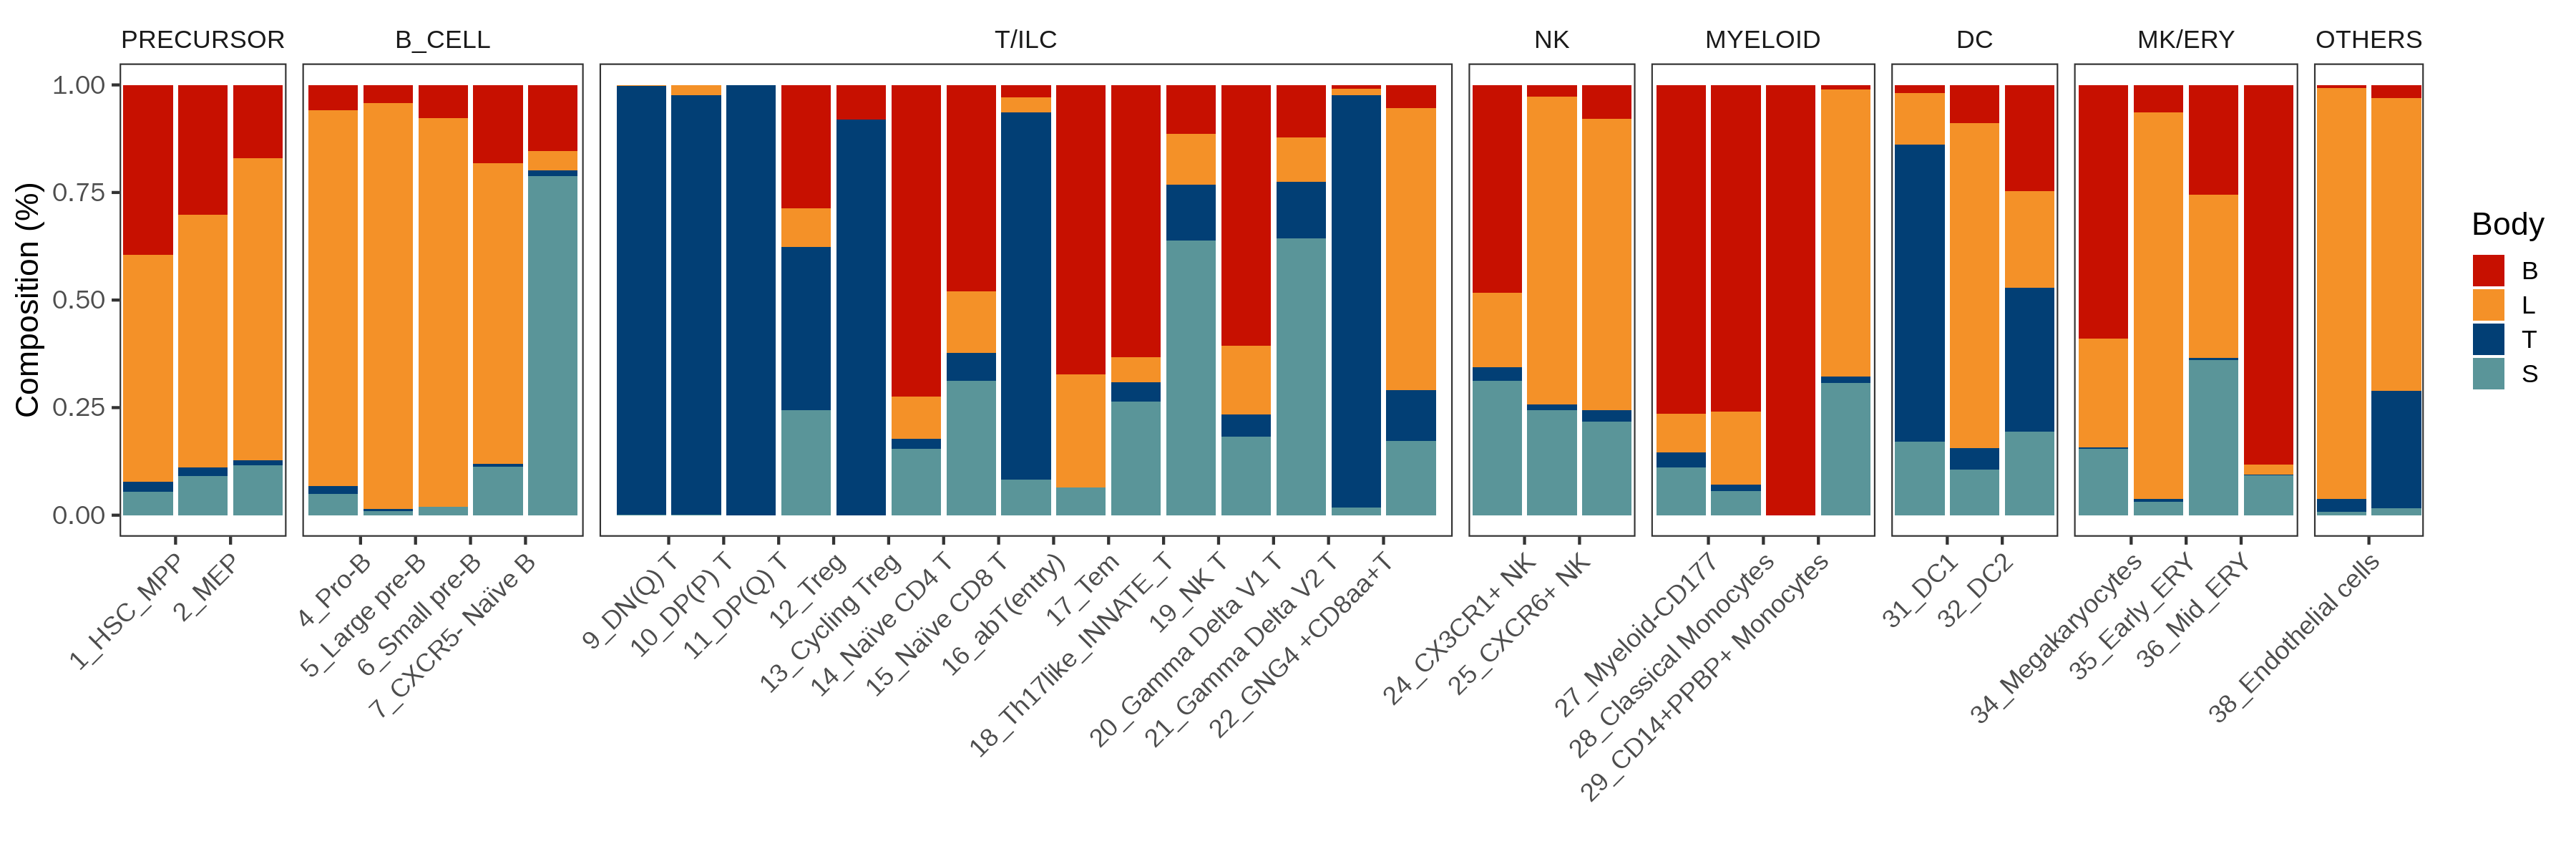

In [44]:
%%R -w 3600 -h 1200 -r 200
### Average Percentage

library(ggplot2)
resultw2 <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num ,Cell_lineage) %>%
  summarise(WeightedAverage = mean(percentage)) %>%
  ungroup()


library(ggplot2)
resultw2$Body<-factor(resultw2$Body,level=c('B','L','T','S'))
resultw2$Last_cell_type_num2 <- as.numeric(as.factor(resultw2$Last_cell_type_num))
# print(resultw2$Last_cell_type_num)
# # print()
# print(as.numeric(resultw2$Last_cell_type_num))
vlines <- 0.5 + seq_len(nlevels(factor(resultw2$Last_cell_type_num))) 
ggplot() +
  geom_col(data=resultw2, aes(x= Last_cell_type_num2, y=WeightedAverage,fill=Body), position="fill") +
#   geom_text(data=sums, aes(x=Last_cell_type_num2, y=1, label=Total), vjust=-0.01, size=0.06, colour="black") +
  theme_minimal() +
  xlab("Cell Type") +
  ylab("Weighted Average") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_grid(. ~ Cell_lineage, space = "free", scales = "free", switch = "y") +
  scale_fill_manual(values=  c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Composition (%)")  +
scale_x_continuous(breaks = vlines[-c(3,8,23,26,30,33,37)],label=levels(resultw2$Last_cell_type_num)[vlines][-c(3,8,23,26,30,33,37)],  # Set tick positions between bars
                    expand=c(0.02,0.01))

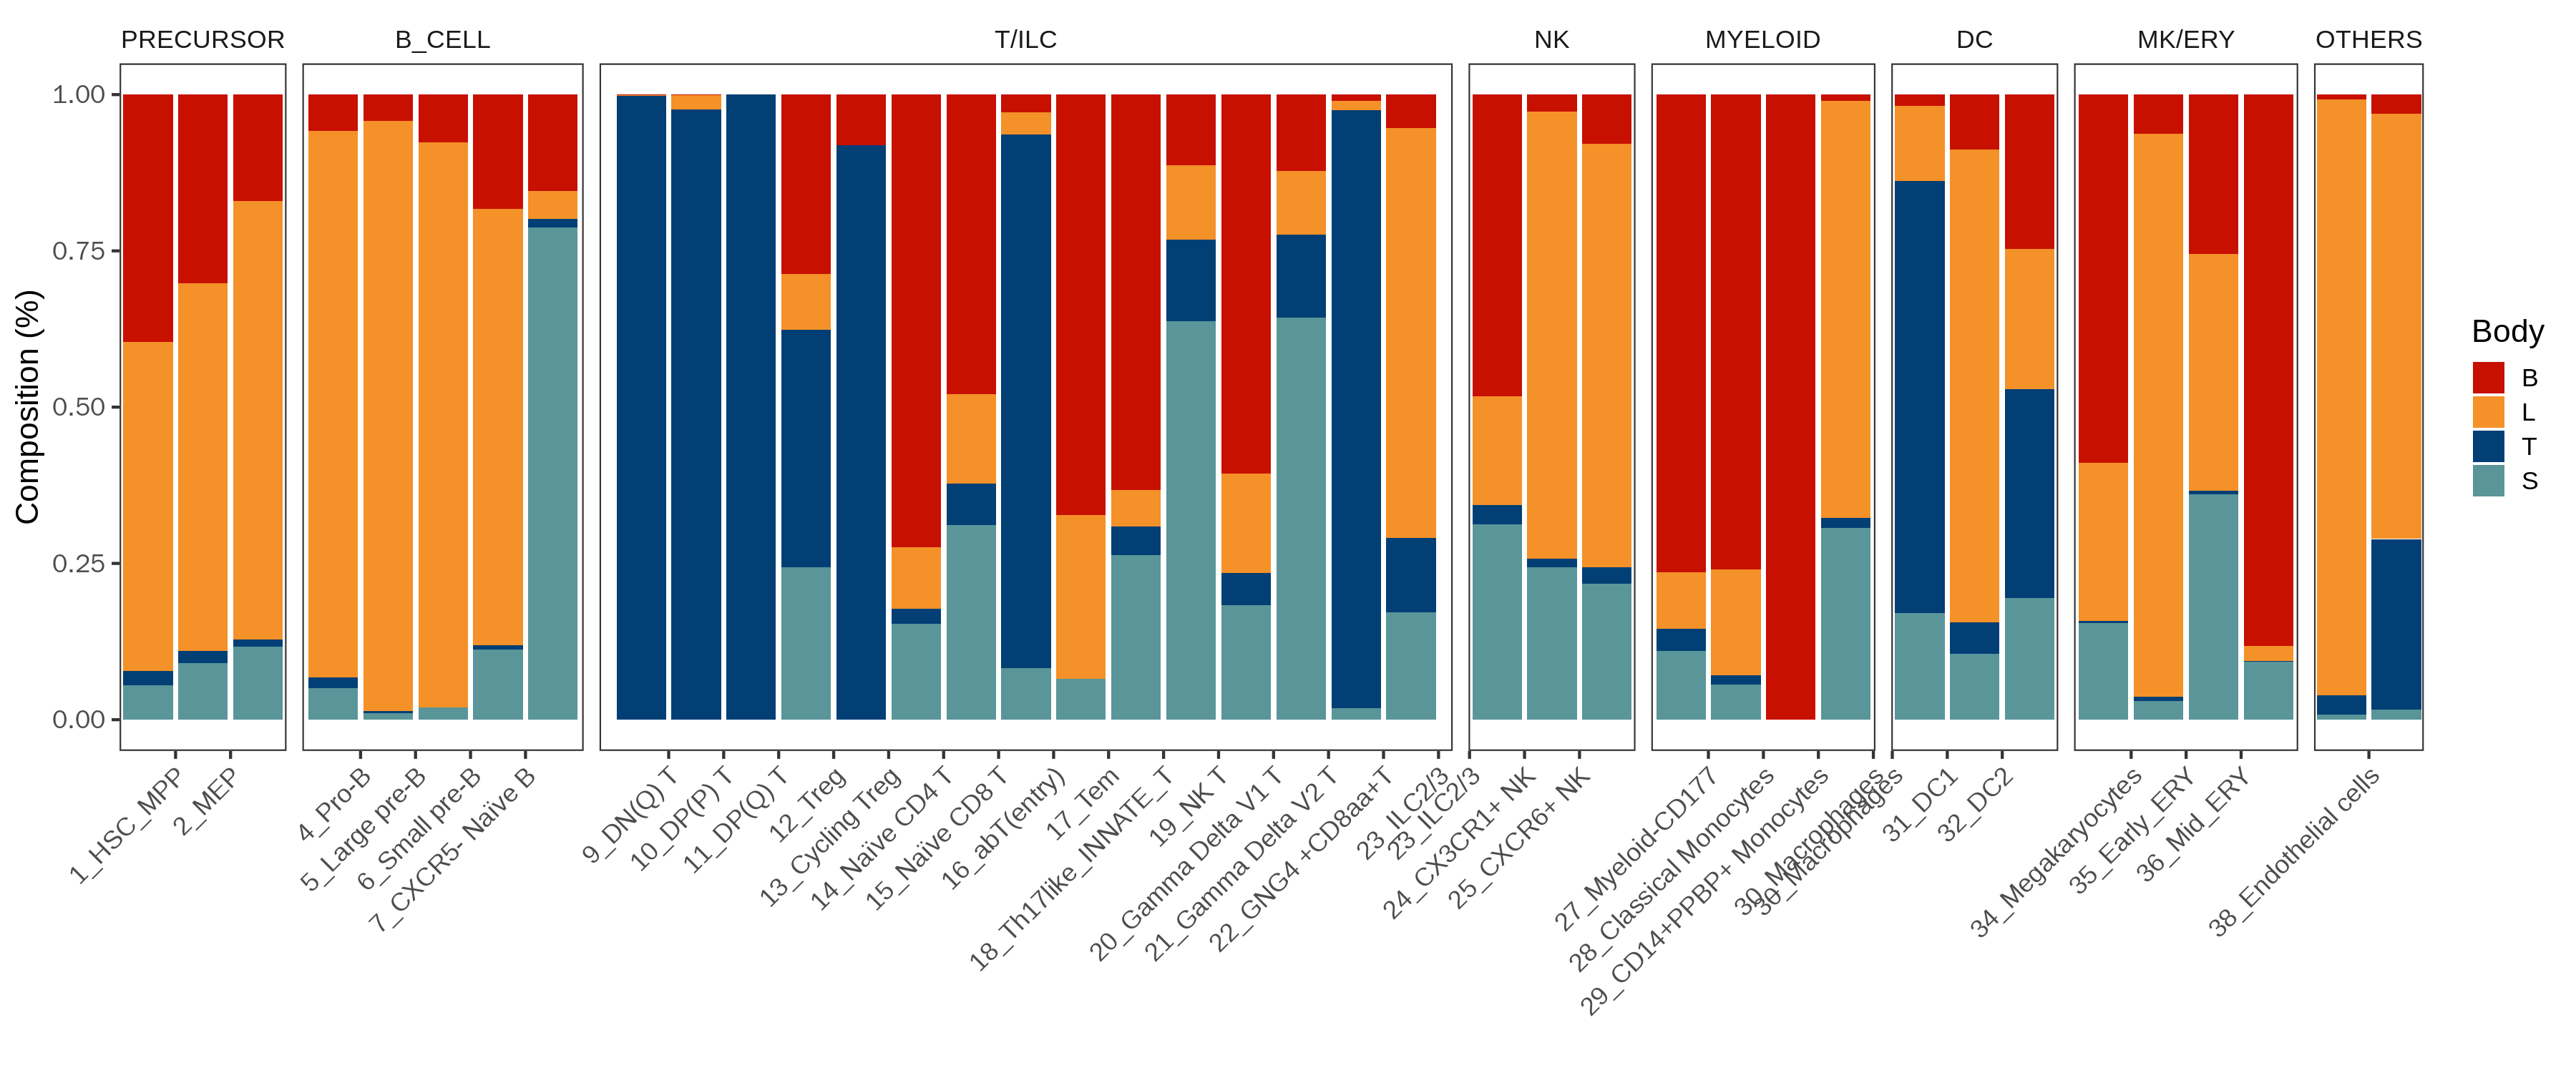

In [45]:
%%R -w 3600 -h 1500 -r 200
sums <- resultw2 %>% 
  group_by(Last_cell_type_num2) %>% 
  summarise(Total = sum(WeightedAverage))
ggplot(resultw2, aes(x= Last_cell_type_num2, y=WeightedAverage,fill=Body)) +
  geom_col(position="fill") +
#   geom_text(data=sums, aes(y=1, label=Total), vjust=-0.5, size=3, colour="black") +
  theme_minimal() +
  xlab("Cell Type") +
  ylab("Weighted Average") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  facet_grid(. ~ Cell_lineage, space = "free", scales = "free", switch = "y") +
  scale_fill_manual(values= c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Composition (%)")  +
scale_x_continuous(breaks = vlines[-c(3,8,26,33,37)],label=levels(resultw2$Last_cell_type_num)[vlines][-c(3,8,26,33,37)],  # Set tick positions between bars
                    expand=c(0.02,0.01))

`summarise()` has grouped output by 'Body', 'Last_cell_type_num'. You can
override using the `.groups` argument.


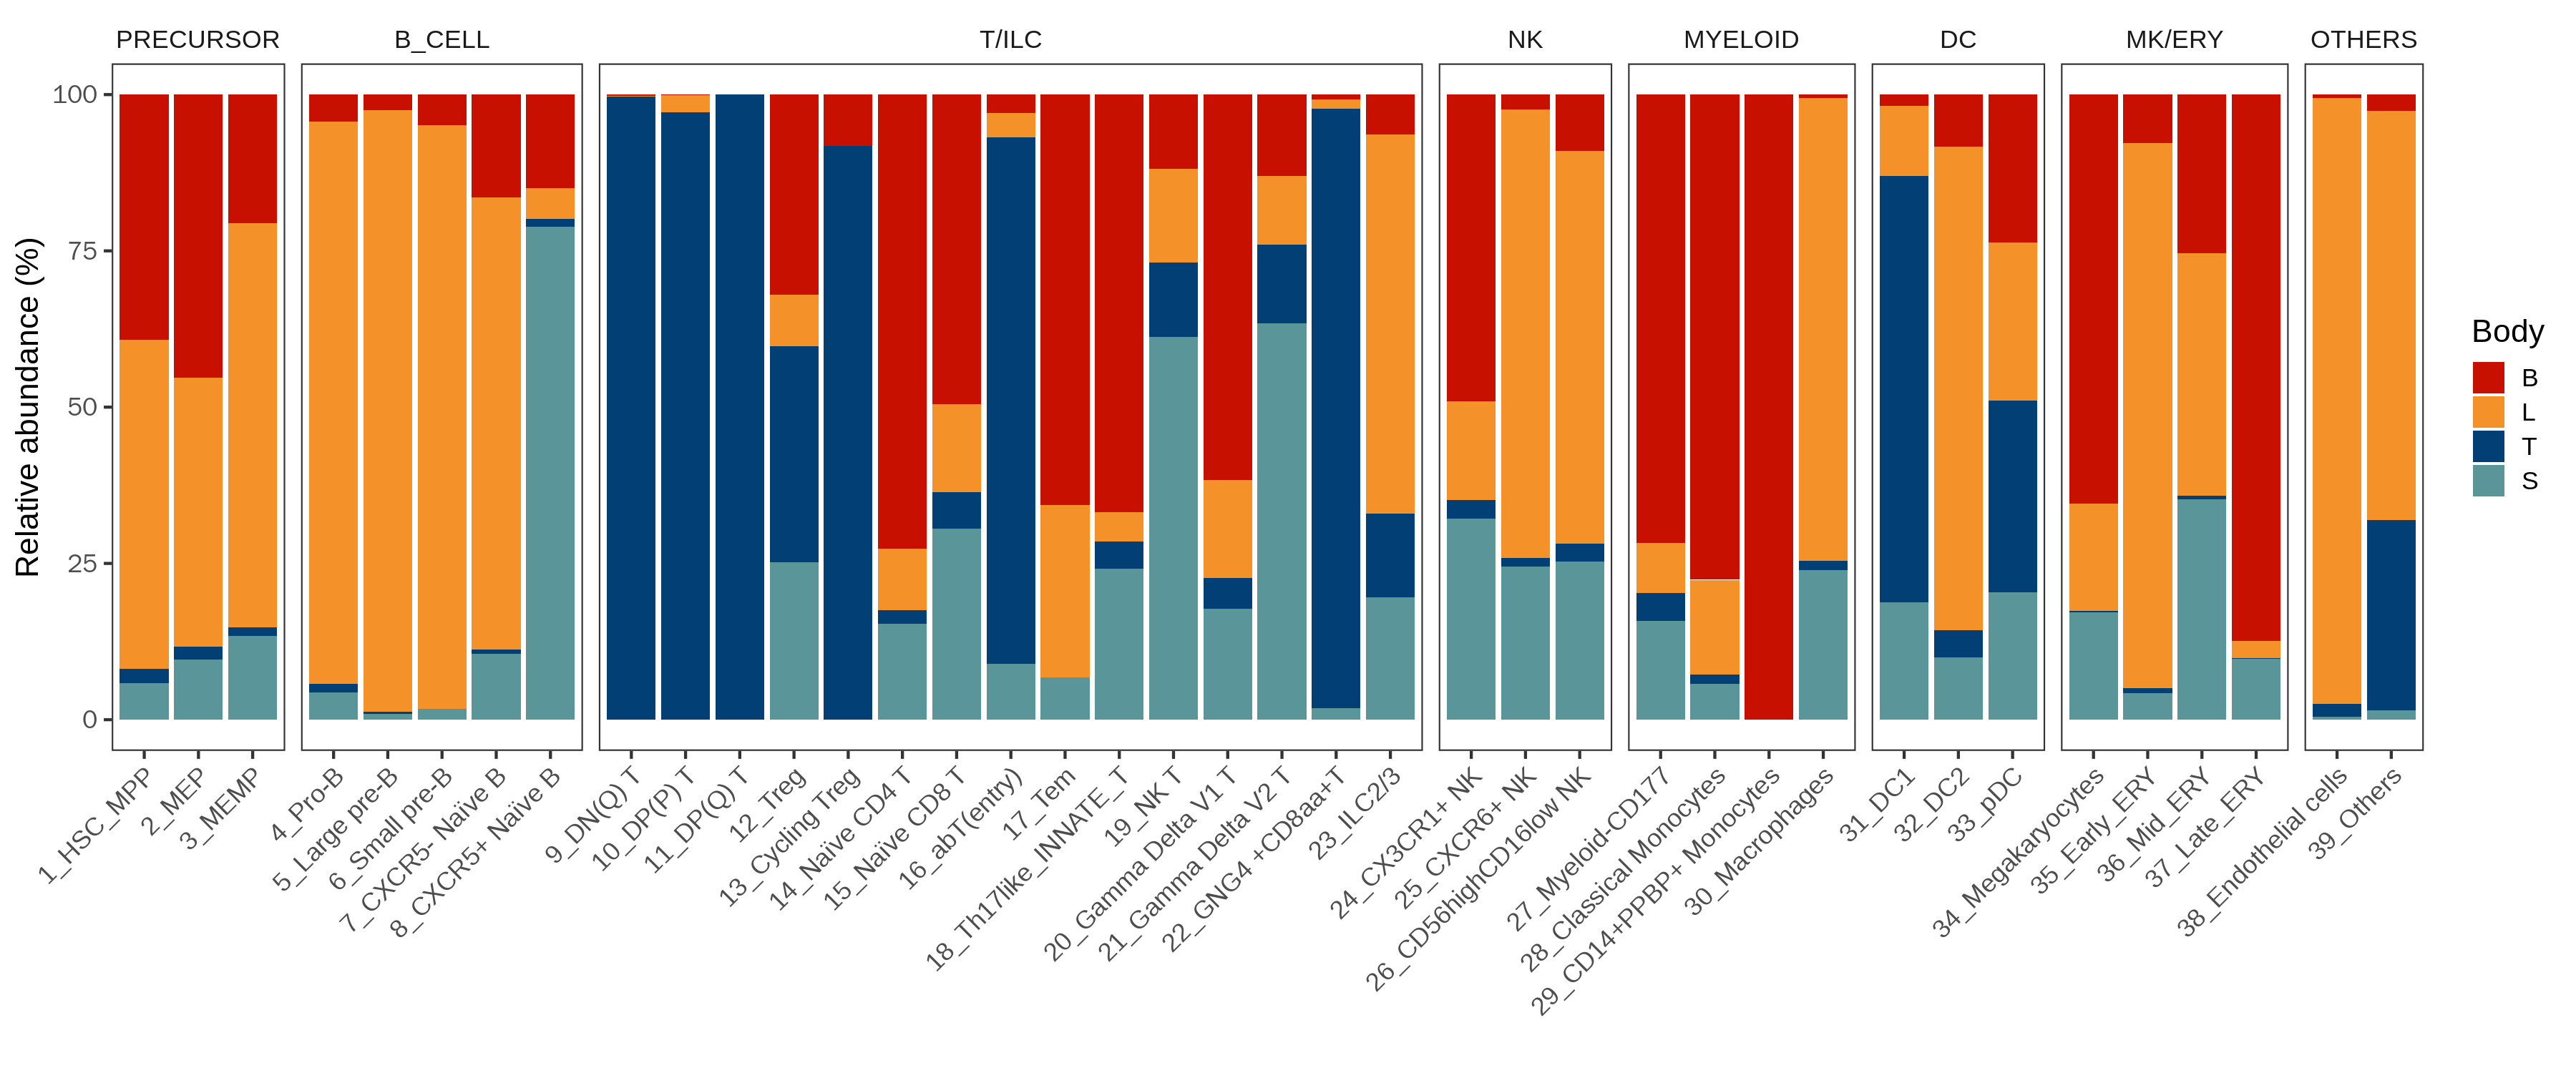

In [46]:
%%R -w 3600 -h 1500 -r 200
library(ggplot2)
resultw <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num ,Cell_lineage) %>%
#   summarise(WeightedAverage = weighted.mean(percentage, week_total))
summarise(WeightedAverage = weighted.mean(percentage,week_total),
            total_samples = n())

library(ggplot2)
resultw$Body<-factor(resultw$Body,level=c('B','L','T','S'))
ggplot(resultw, aes(x= Last_cell_type_num, y=WeightedAverage,fill=Body)) +
  geom_col(position="fill") +
  theme_minimal() +
  xlab("Cell Type") +
  ylab("Weighted Average") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
#   scale_fill_brewer(palette = "Set1") +  
facet_grid(. ~ Cell_lineage, space = "free", scales = "free", switch = "y") +
  scale_fill_manual(values=  c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Relative abundance (%)")  +
scale_y_continuous(labels=seq(0,100, by=25)) +xlab("")


In [47]:
%%R -w 3600 -h 1500 -r 200
library(ggplot2)
resultw <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num ,Cell_lineage) %>%
  summarise(WeightedAverage = weighted.mean(percentage, week_total))
# summarise(WeightedAverage = weighted.mean(percentage,week_total),
#             total_samples = n())
resultw 

`summarise()` has grouped output by 'Body', 'Last_cell_type_num'. You can
override using the `.groups` argument.
# A tibble: 146 × 4
# Groups:   Body, Last_cell_type_num [146]
   Body  Last_cell_type_num Cell_lineage WeightedAverage
   <fct> <fct>              <fct>                  <dbl>
 1 B     1_HSC_MPP          PRECURSOR           0.0152  
 2 B     2_MEP              PRECURSOR           0.00641 
 3 B     3_MEMP             PRECURSOR           0.00931 
 4 B     4_Pro-B            B_CELL              0.00118 
 5 B     5_Large pre-B      B_CELL              0.000993
 6 B     6_Small pre-B      B_CELL              0.000300
 7 B     7_CXCR5- Naïve B   B_CELL              0.0278  
 8 B     8_CXCR5+ Naïve B   B_CELL              0.0967  
 9 B     9_DN(Q) T          T/ILC               0.000333
10 B     10_DP(P) T         T/ILC               0.000245
# ℹ 136 more rows
# ℹ Use `print(n = ...)` to see more rows


In [48]:
%%R
organ_count <- grouped_data_result %>%
  group_by(Body) %>%
  summarise(organ_count = n_distinct(Body))
organ_count

# A tibble: 4 × 2
  Body  organ_count
  <fct>       <int>
1 B               1
2 L               1
3 T               1
4 S               1


In [49]:
%%R
library(dplyr)
library(ggplot2)



# Extract the unique AdjustedID values
unique_adjusted_id <- unique(grouped_data_result$AdjustedID)

# Extract the first letter of the unique AdjustedID values and calculate the number of occurrences
adjusted_id_first_letter <- substr(unique_adjusted_id, 1, 1)
body_count <- as.data.frame(table(adjusted_id_first_letter))
names(body_count) <- c("Body", "body_count")

grouped_data_result <- grouped_data_result %>%
  select(-contains("body_count"))
# Add body_count to grouped_data_result
grouped_data_result <- left_join(grouped_data_result, body_count, by = "Body")
grouped_data_result
# # Calculate the weighted average with body_count as part of the weights
# resultw <- grouped_data_result %>%
#   group_by(Body, Last_cell_type_num, Cell_lineage) %>%
#   summarise(WeightedAverage = weighted.mean(percentage, week_total * body_count[1]),
#             total_samples = n(),
#             body_count = first(body_count))

# A tibble: 961 × 14
   AdjustedID Part1 Body  Week  Part2 Last_cell_type_num   Cell_lineage count
   <chr>      <chr> <fct> <chr> <chr> <fct>                <fct>        <int>
 1 B11.6_P24  B11   B     11    6_P24 12_Treg              T/ILC          247
 2 B11.6_P24  B11   B     11    6_P24 13_Cycling Treg      T/ILC           13
 3 B11.6_P24  B11   B     11    6_P24 14_Naïve CD4 T       T/ILC          444
 4 B11.6_P24  B11   B     11    6_P24 15_Naïve CD8 T       T/ILC           96
 5 B11.6_P24  B11   B     11    6_P24 16_abT(entry)        T/ILC           31
 6 B11.6_P24  B11   B     11    6_P24 18_Th17like_INNATE_T T/ILC           21
 7 B11.6_P24  B11   B     11    6_P24 19_NK T              T/ILC           58
 8 B11.6_P24  B11   B     11    6_P24 1_HSC_MPP            PRECURSOR      655
 9 B11.6_P24  B11   B     11    6_P24 21_Gamma Delta V2 T  T/ILC          114
10 B11.6_P24  B11   B     11    6_P24 22_GNG4 +CD8aa+T     T/ILC            1
# ℹ 951 more rows
# ℹ 6 more variables: wee

In [50]:
%%R -w 3600 -h 1500 -r 200
library(ggplot2)
# # Calculate the weighted average with body_count as part of the weights
resultw <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num, Cell_lineage) %>%
  mutate(WeightedAverage = weighted.mean(percentage, week_total * body_count))
resultw

# A tibble: 961 × 15
# Groups:   Body, Last_cell_type_num, Cell_lineage [146]
   AdjustedID Part1 Body  Week  Part2 Last_cell_type_num   Cell_lineage count
   <chr>      <chr> <fct> <chr> <chr> <fct>                <fct>        <int>
 1 B11.6_P24  B11   B     11    6_P24 12_Treg              T/ILC          247
 2 B11.6_P24  B11   B     11    6_P24 13_Cycling Treg      T/ILC           13
 3 B11.6_P24  B11   B     11    6_P24 14_Naïve CD4 T       T/ILC          444
 4 B11.6_P24  B11   B     11    6_P24 15_Naïve CD8 T       T/ILC           96
 5 B11.6_P24  B11   B     11    6_P24 16_abT(entry)        T/ILC           31
 6 B11.6_P24  B11   B     11    6_P24 18_Th17like_INNATE_T T/ILC           21
 7 B11.6_P24  B11   B     11    6_P24 19_NK T              T/ILC           58
 8 B11.6_P24  B11   B     11    6_P24 1_HSC_MPP            PRECURSOR      655
 9 B11.6_P24  B11   B     11    6_P24 21_Gamma Delta V2 T  T/ILC          114
10 B11.6_P24  B11   B     11    6_P24 22_GNG4 +CD8aa+T     T/ILC

`summarise()` has grouped output by 'Body', 'Last_cell_type_num'. You can
override using the `.groups` argument.


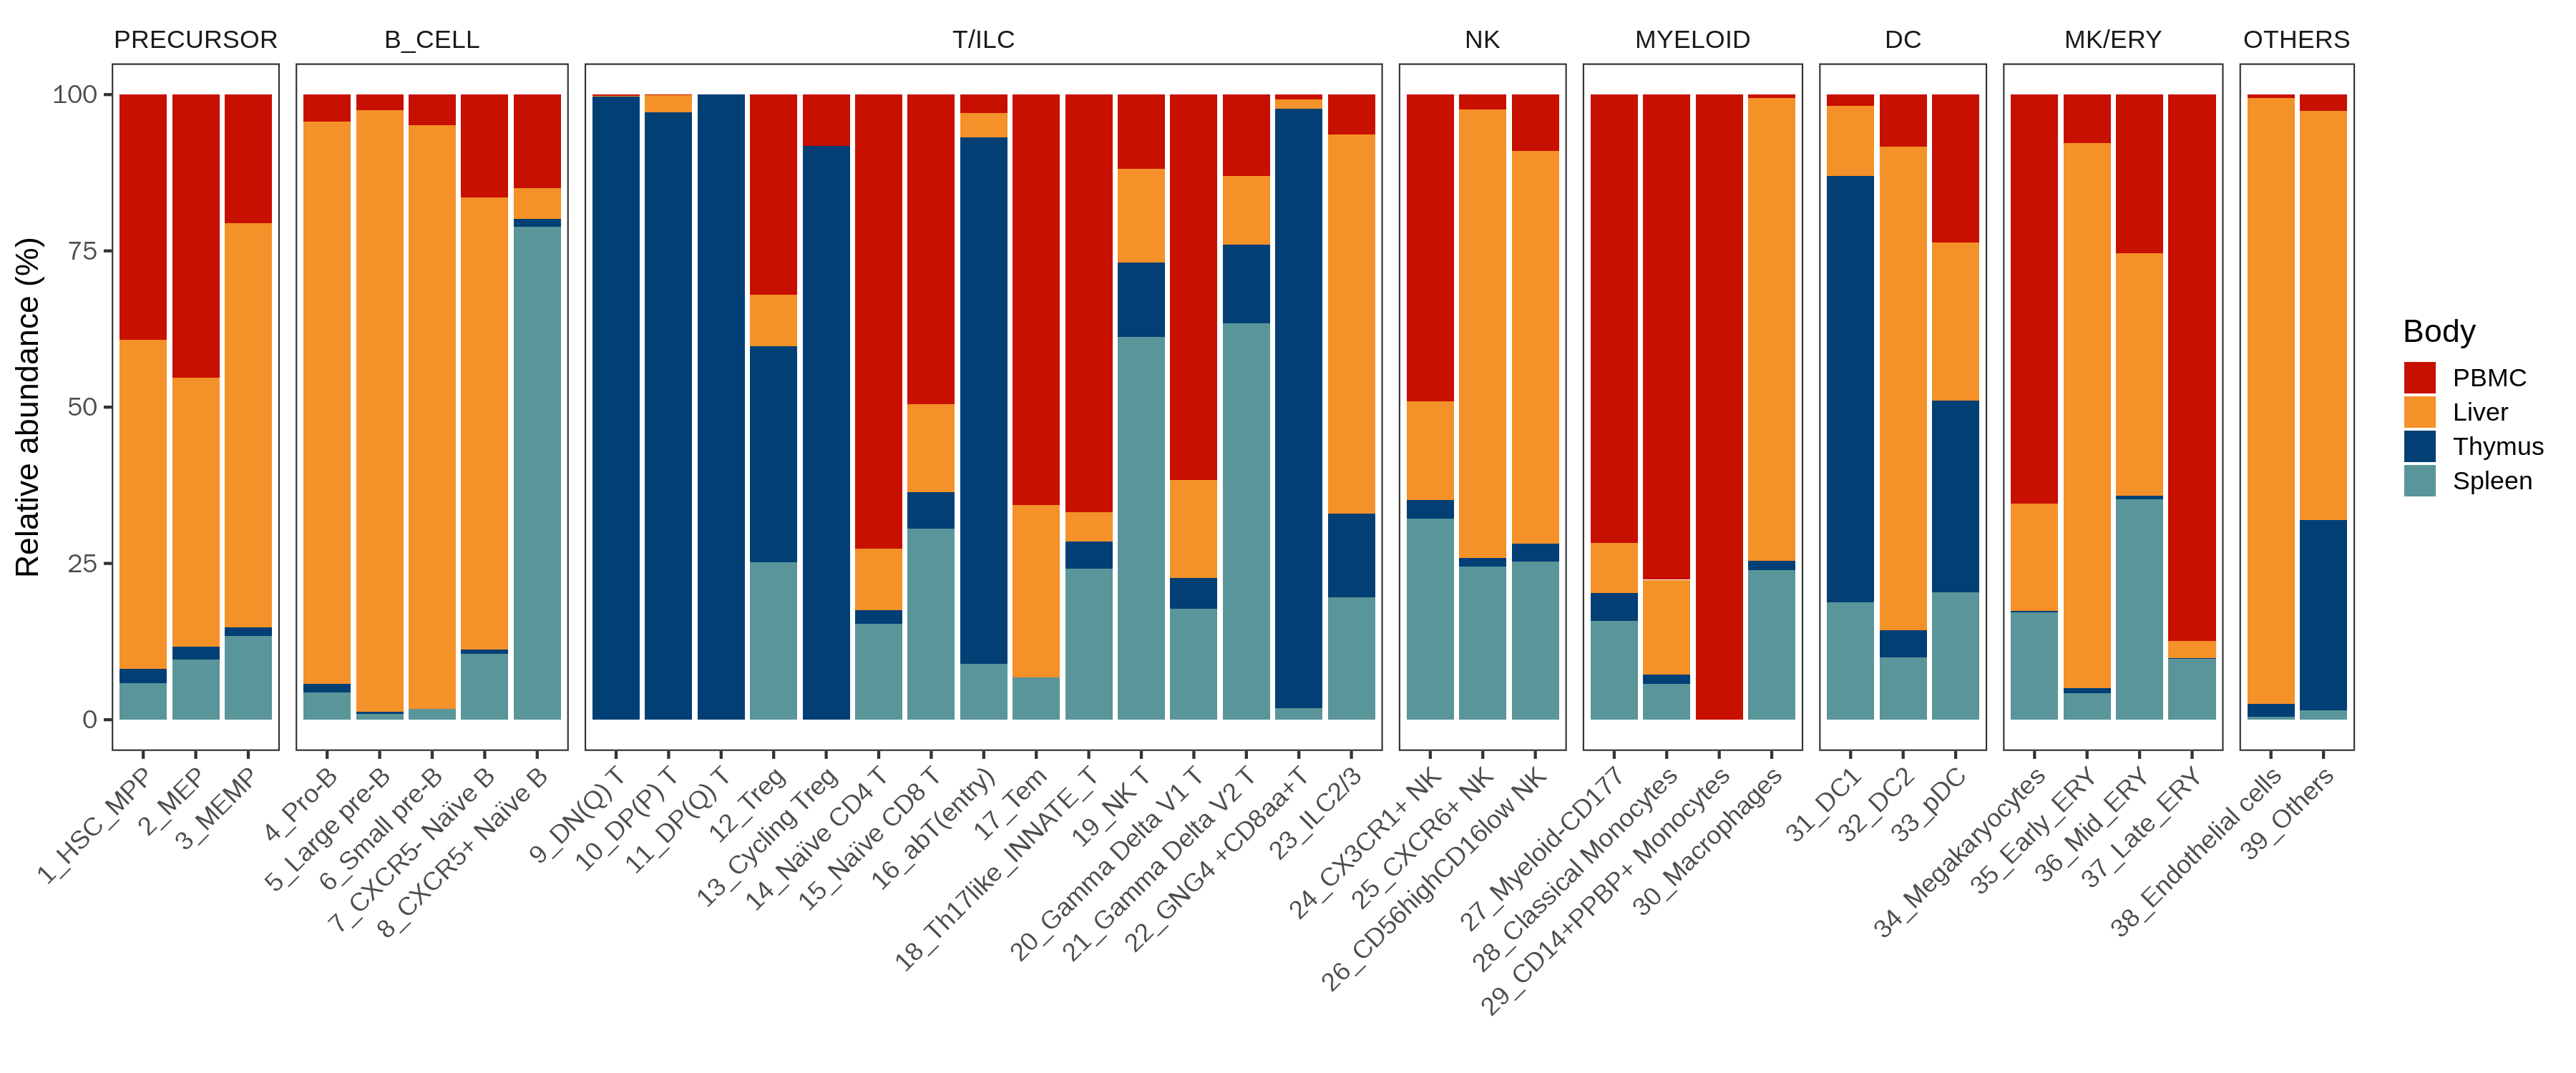

In [51]:
%%R -w 3600 -h 1500 -r 200
library(ggplot2)
unique_adjusted_id <- unique(grouped_data_result$AdjustedID)


adjusted_id_first_letter <- substr(unique_adjusted_id, 1, 1)
body_count <- as.data.frame(table(adjusted_id_first_letter))
names(body_count) <- c("Body", "body_count")

grouped_data_result <- grouped_data_result %>%
  select(-contains("body_count"))

grouped_data_result <- left_join(grouped_data_result, body_count, by = "Body")
grouped_data_result

resultw <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num, Cell_lineage) %>%
  summarise(WeightedAverage = weighted.mean(percentage, week_total * body_count))
resultw

library(ggplot2)
resultw$Body<-factor(resultw$Body,level=c('B','L','T','S'),label=c("PBMC","Liver","Thymus","Spleen"))
P21=ggplot(resultw, aes(x= Last_cell_type_num, y=WeightedAverage,fill=Body)) +
  geom_col(position="fill") +
  theme_minimal() +
  xlab("Cell Type") +
  ylab("Weighted Average") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
#   scale_fill_brewer(palette = "Set1") +  
facet_grid(. ~ Cell_lineage, space = "free", scales = "free", switch = "y") +
  scale_fill_manual(values= c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank())+xlab("")+ylab("Relative abundance (%)")  +
scale_y_continuous(labels=seq(0,100, by=25)) +xlab("")
P21
ggsave(plot=P21,"/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure1/Figure1F_Organpercentage_plot.pdf", width = 16, height = 8)
P21

In [52]:
%%R
grouped_data_result2 <- grouped_data_result %>%
  group_by(AdjustedID, Last_cell_type_num, Body) %>%
  mutate(WeightedAverage1 = weighted.mean(count, week_total))
all(grouped_data_result2$WeightedAverage1==grouped_data_result2$count)


[1] TRUE


In [53]:
%%R

grouped_data_result2 <- grouped_data_result %>%
  group_by(AdjustedID, Last_cell_type_num, Body, Cell_lineage) %>%
  summarise(WeightedAverage1 = weighted.mean(count, week_total))
grouped_data_result2


`summarise()` has grouped output by 'AdjustedID', 'Last_cell_type_num', 'Body'.
You can override using the `.groups` argument.
# A tibble: 961 × 5
# Groups:   AdjustedID, Last_cell_type_num, Body [961]
   AdjustedID Last_cell_type_num Body  Cell_lineage WeightedAverage1
   <chr>      <fct>              <fct> <fct>                   <dbl>
 1 B11.6_P24  1_HSC_MPP          B     PRECURSOR                 655
 2 B11.6_P24  2_MEP              B     PRECURSOR                 829
 3 B11.6_P24  3_MEMP             B     PRECURSOR                 652
 4 B11.6_P24  4_Pro-B            B     B_CELL                     54
 5 B11.6_P24  5_Large pre-B      B     B_CELL                      2
 6 B11.6_P24  7_CXCR5- Naïve B   B     B_CELL                    332
 7 B11.6_P24  8_CXCR5+ Naïve B   B     B_CELL                    682
 8 B11.6_P24  9_DN(Q) T          B     T/ILC                       7
 9 B11.6_P24  12_Treg            B     T/ILC                     247
10 B11.6_P24  13_Cycling Treg    B     

In [54]:

mkdir -p  All_scanpyData/Countplot

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


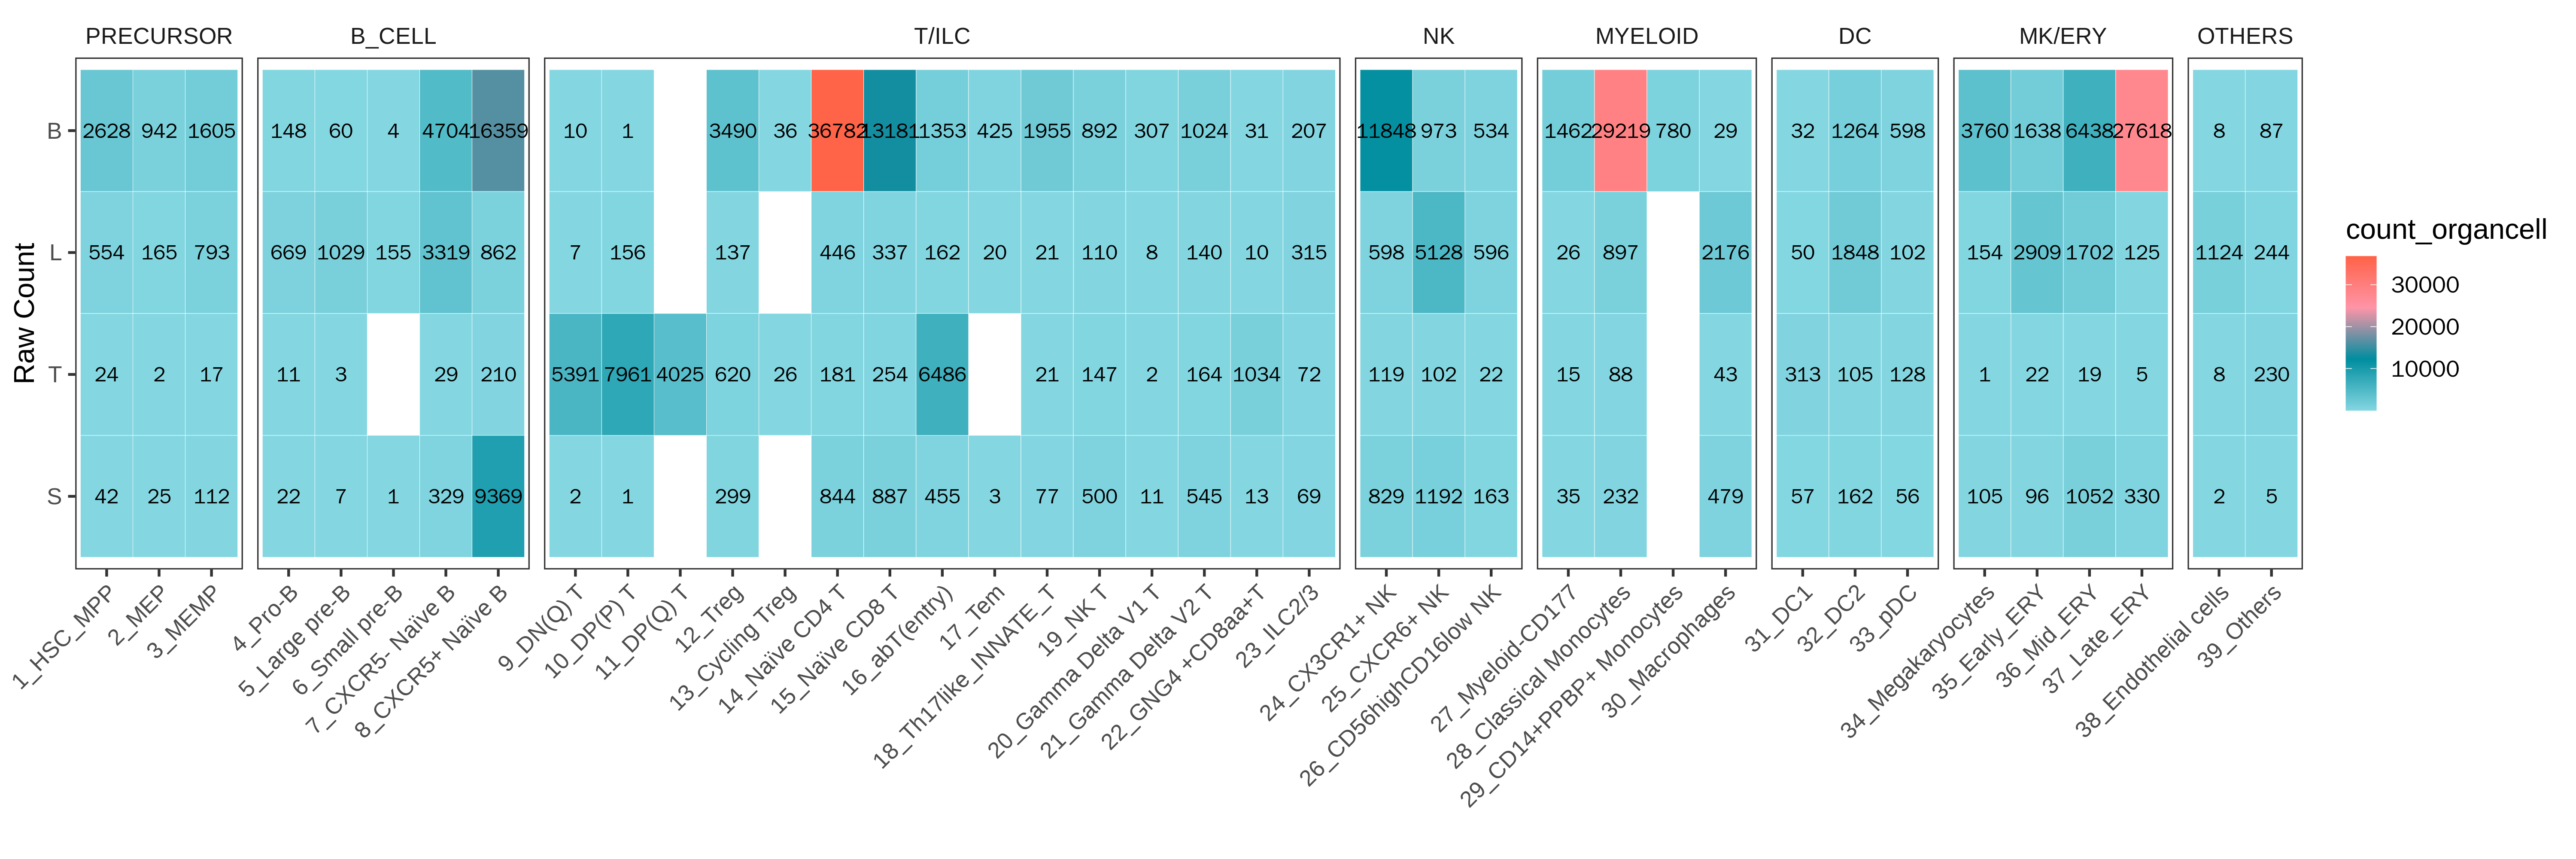

In [55]:
%%R -w 6000 -h 2000 -r 300

library(dplyr)
library(RColorBrewer )


grouped_data_result3 <- grouped_data_result %>%
  group_by(Last_cell_type_num, Body) %>%
  mutate(count_organcell = sum(count)) %>%
  ungroup() %>%
  distinct(Last_cell_type_num, Body, .keep_all = TRUE)

grouped_data_result3


grouped_data_result3$Body <-factor(grouped_data_result3$Body,level=rev(c('B','L','T','S') ))
countplot=ggplot(grouped_data_result3 , aes(x =Last_cell_type_num , y = Body, fill = count_organcell)) +
  geom_tile(color = "white") +  
  geom_text(aes(label = round(count_organcell)), size = 4) + 
  scale_fill_gradient(low = "white", high = "steelblue") +  
  theme_minimal() +
  xlab("Body") +
  ylab("Cell Type") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
facet_grid(.~ Cell_lineage,, space = "free", scales = "free", switch = "y") +
#   facet_grid(. ~ Cell_lineage) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank()) +
  xlab("") +
  ylab("Raw Count")+scale_fill_gradientn(colours = rev(colorRampPalette(c("#FF6348FF", "#FF95A8FF", "#008EA0FF","#84D7E1FF"))(100)))

countplot

ggsave(plot=countplot,'All_scanpyData/Countplot/countplot.pdf',width=25,height=5)
countplot

In [56]:
%%R
grouped_data_result3sums <- grouped_data_result3 %>% 
  group_by(Last_cell_type_num) %>% 
  summarise(Total = sum( count_organcell))

write.csv(grouped_data_result3sums,'All_scanpyData/Countplot/countplot_sums.csv')

In [57]:
%%R
resultw

# A tibble: 146 × 4
# Groups:   Body, Last_cell_type_num [146]
   Body  Last_cell_type_num Cell_lineage WeightedAverage
   <fct> <fct>              <fct>                  <dbl>
 1 PBMC  1_HSC_MPP          PRECURSOR           0.0152  
 2 PBMC  2_MEP              PRECURSOR           0.00641 
 3 PBMC  3_MEMP             PRECURSOR           0.00931 
 4 PBMC  4_Pro-B            B_CELL              0.00118 
 5 PBMC  5_Large pre-B      B_CELL              0.000993
 6 PBMC  6_Small pre-B      B_CELL              0.000300
 7 PBMC  7_CXCR5- Naïve B   B_CELL              0.0278  
 8 PBMC  8_CXCR5+ Naïve B   B_CELL              0.0967  
 9 PBMC  9_DN(Q) T          T/ILC               0.000333
10 PBMC  10_DP(P) T         T/ILC               0.000245
# ℹ 136 more rows
# ℹ Use `print(n = ...)` to see more rows


`summarise()` has grouped output by 'Body', 'Last_cell_type_num'. You can
override using the `.groups` argument.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


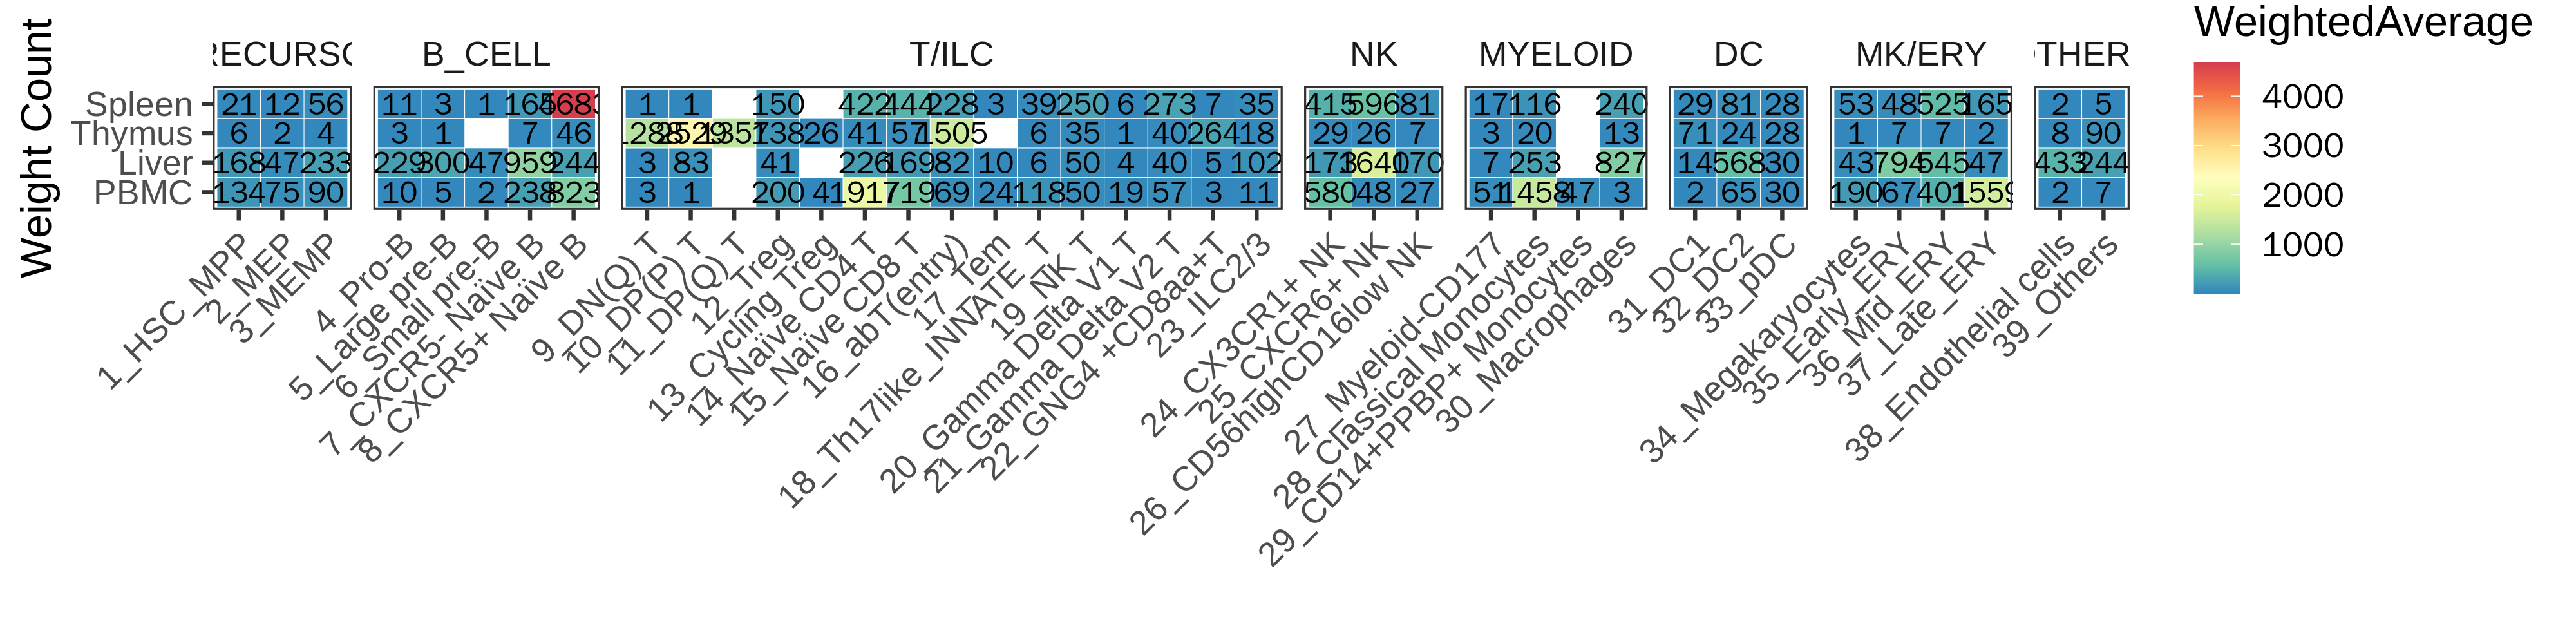

In [58]:
%%R -w 4000 -h 1000 -r 300
resultw <- grouped_data_result %>%
  group_by(Body, Last_cell_type_num, Cell_lineage) %>%
  summarise(WeightedAverage = weighted.mean(count, week_total ))
resultw
resultw2=resultw

resultw2$Body <-factor(resultw2$Body,level=c('B','L','T','S'),label=c("PBMC","Liver","Thymus","Spleen"))


wegitcountplot=ggplot(resultw2, aes(x =Last_cell_type_num , y = Body, fill = WeightedAverage)) +
  geom_tile(color = "white") + 
  geom_text(aes(label = round(WeightedAverage)), size = 4) + 
  scale_fill_gradient(low = "white", high = "steelblue") +  
  theme_minimal() +
  xlab("Body") +
  ylab("Cell Type") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
facet_grid(.~ Cell_lineage,, space = "free", scales = "free", switch = "y") +
#   facet_grid(. ~ Cell_lineage) +
  theme_bw(base_size = 16) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank()) +
  xlab("") +
  ylab("Weight Count")+scale_fill_gradientn(colours = rev(colorRampPalette(brewer.pal(9, "Spectral"))(100)))

wegitcountplot

ggsave(plot=wegitcountplot,'/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/S4/S4_wegitcountplot.pdf',width=20,height=4)
wegitcountplot


In [59]:
%%R
resultw2_sums <- resultw2 %>% 
  group_by(Last_cell_type_num) %>% 
  summarise(Total = sum(WeightedAverage))

write.csv(resultw2_sums,'All_scanpyData/Countplot/resultw2_sums.csv')

In [60]:
%%R -w 3000 -h 1200 -r 150
adata1_obs2<-adata1_obs[!adata1_obs$Last_cell_type %in% c('Megakaryocytes','Early_ERY','Mid_ERY','Late_ERY','Late_ERY'),]
CD45_result <- process_grouped_data(adata1_obs2)
head(adata1_obs)
print(CD45_result[, 1:6])
print(CD45_result[, 7:12])

`summarise()` has grouped output by 'AdjustedID', 'Last_cell_type_num'. You can
override using the `.groups` argument.
# A tibble: 842 × 6
   AdjustedID Part1 Body  Week  Part2 Last_cell_type_num  
   <chr>      <chr> <chr> <chr> <chr> <chr>               
 1 B11.6_P24  B11   B     11    6_P24 12_Treg             
 2 B11.6_P24  B11   B     11    6_P24 13_Cycling Treg     
 3 B11.6_P24  B11   B     11    6_P24 14_Naïve CD4 T      
 4 B11.6_P24  B11   B     11    6_P24 15_Naïve CD8 T      
 5 B11.6_P24  B11   B     11    6_P24 16_abT(entry)       
 6 B11.6_P24  B11   B     11    6_P24 18_Th17like_INNATE_T
 7 B11.6_P24  B11   B     11    6_P24 19_NK T             
 8 B11.6_P24  B11   B     11    6_P24 1_HSC_MPP           
 9 B11.6_P24  B11   B     11    6_P24 21_Gamma Delta V2 T 
10 B11.6_P24  B11   B     11    6_P24 22_GNG4 +CD8aa+T    
# ℹ 832 more rows
# ℹ Use `print(n = ...)` to see more rows
# A tibble: 842 × 6
   Cell_lineage count week_total percentage week_number AdjustedID_numeri

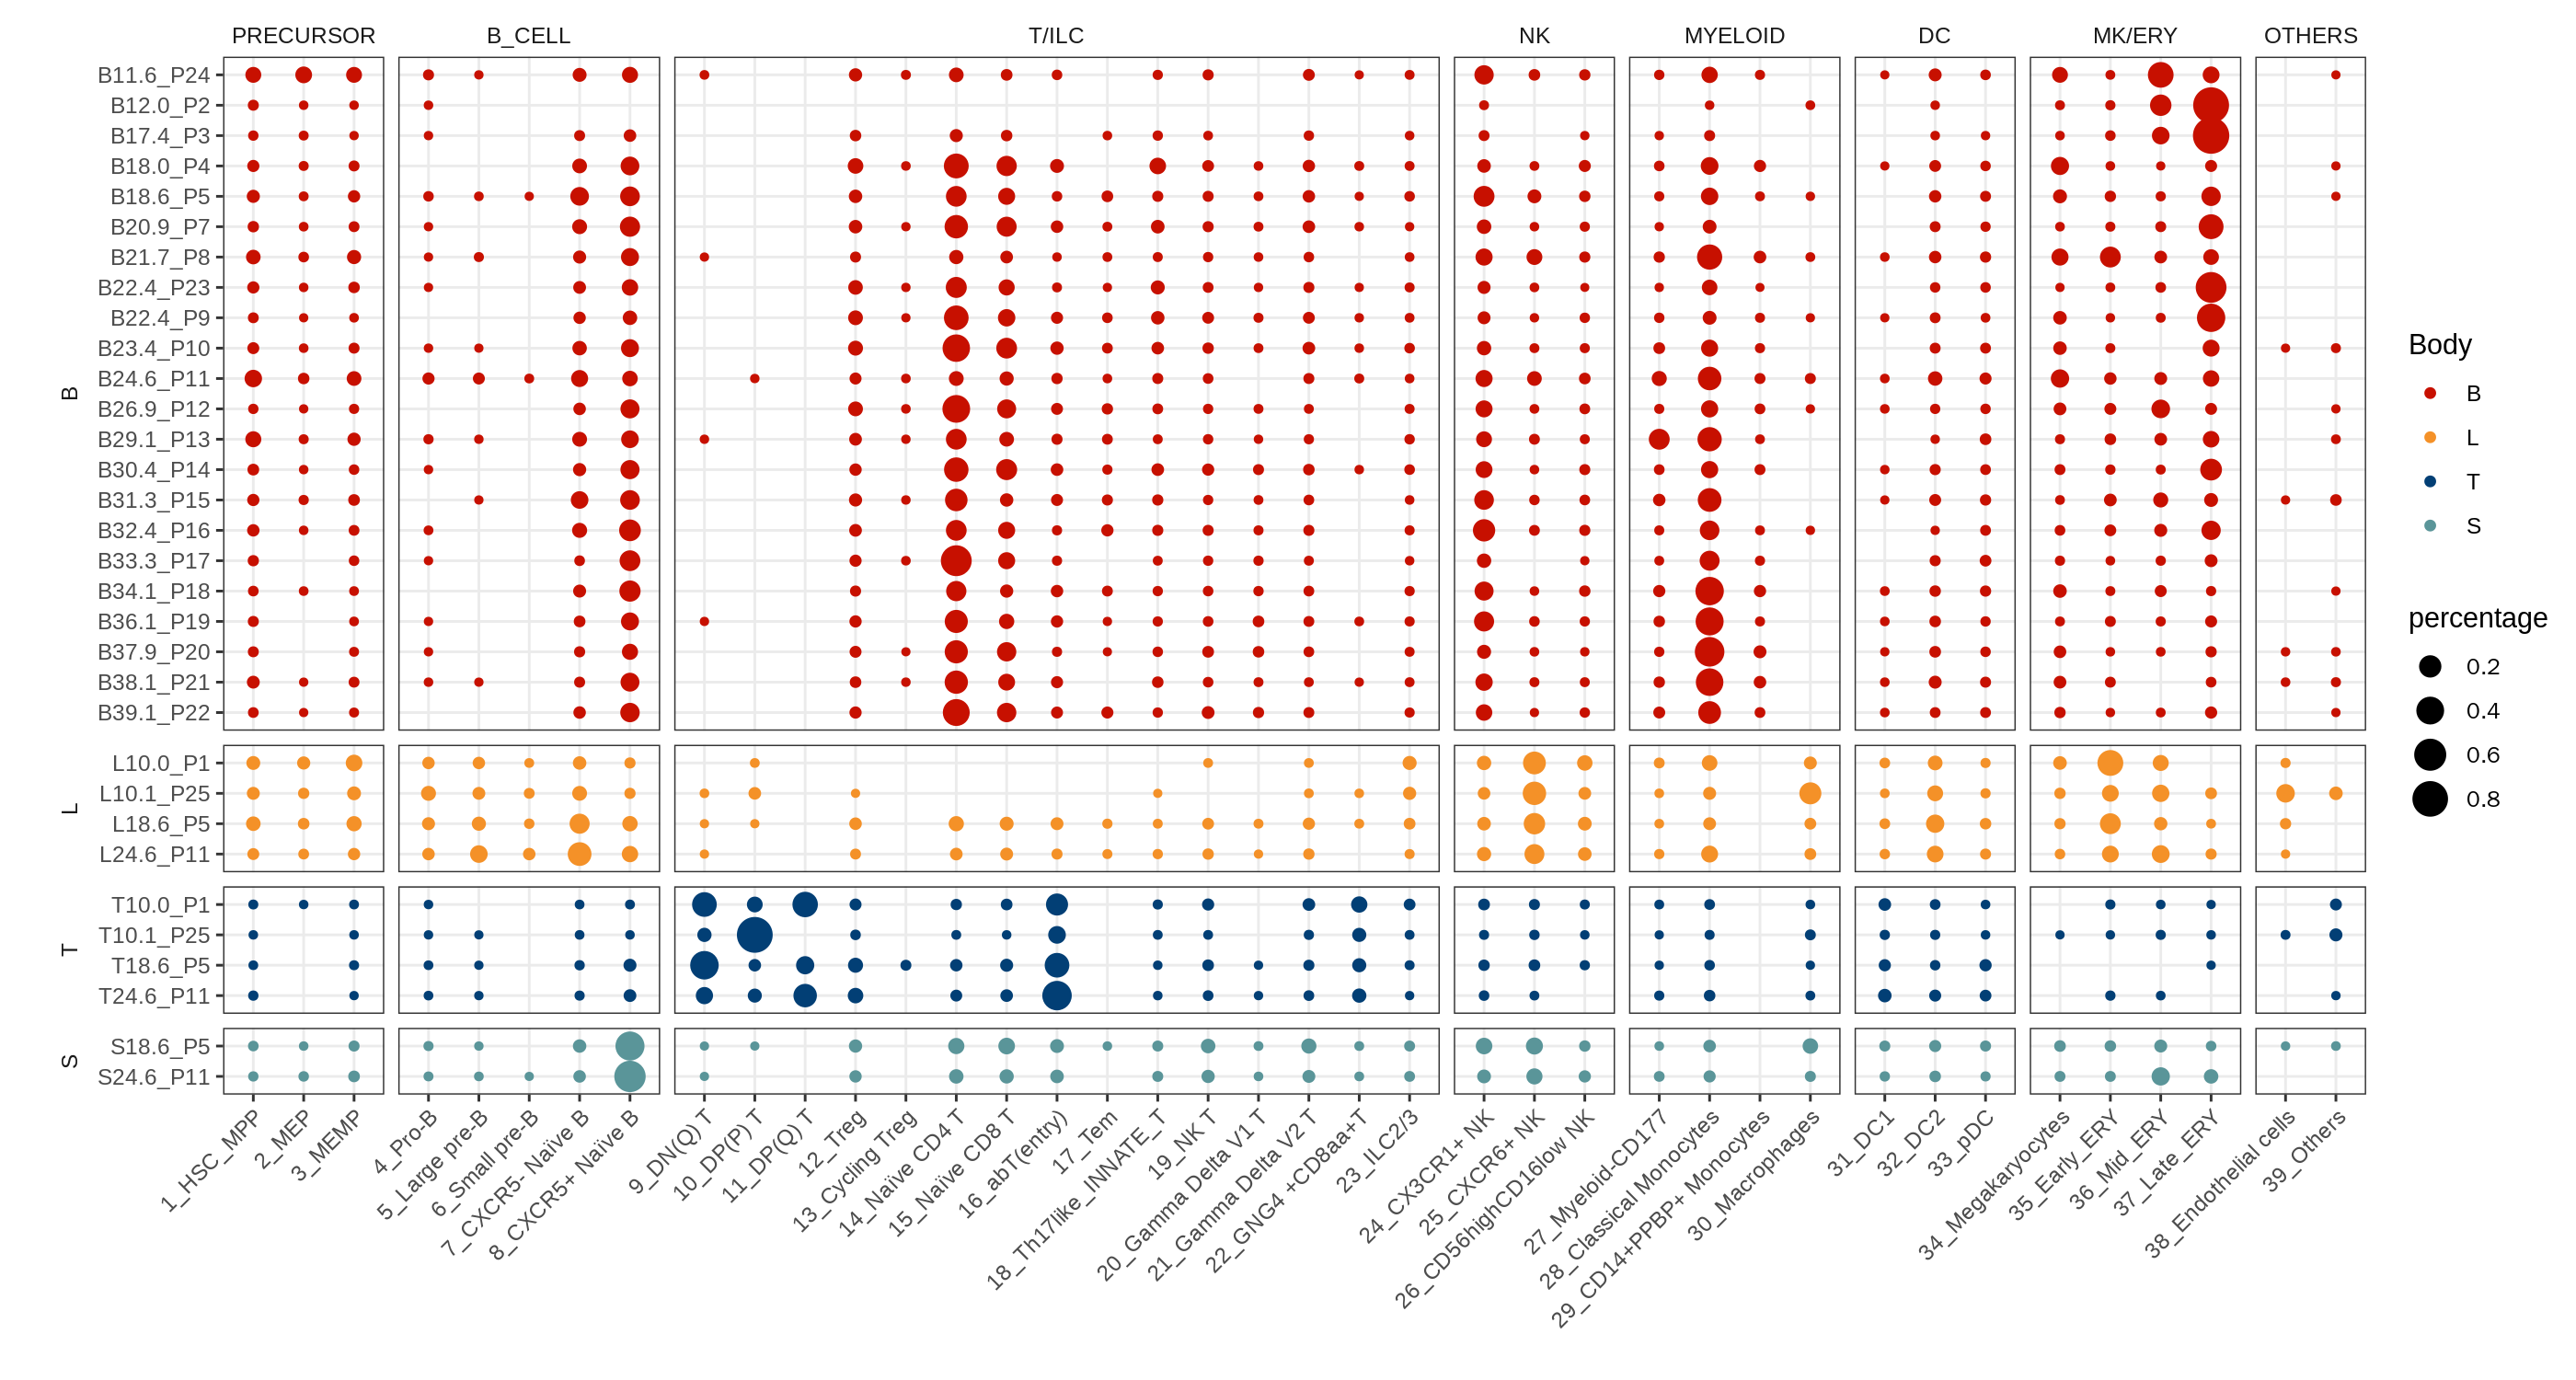

In [61]:
%%R -w 2800 -h 1500 -r 200
grouped_data_result$Cell_lineage<-factor(grouped_data_result$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))
grouped_data_result$Body<-factor(grouped_data_result$Body,level=c('B','L','T','S'))
P1p=ggplot(grouped_data_result )+ geom_point(aes(x=Last_cell_type_num,y= factor(AdjustedID,level=rev(levels(factor(CD45_result$AdjustedID)))),size=percentage,color=Body)
                                )+

facet_grid(Body ~ Cell_lineage,, space = "free", scales = "free", switch = "y") + theme_bw()+ 
scale_color_manual(values= c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
 theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.background = element_blank(),
    strip.placement = "",  # place facet labels outside the plot area
    strip.text.y.left = element_text(angle = 90)  # rotate facet labels to vertical
  ) +
  xlab('') + ylab('')
P1p
ggsave(plot=P1p,'/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/SupR1_Unorganized/Sup_percentage.pdf',width=12,height=8)
P1p

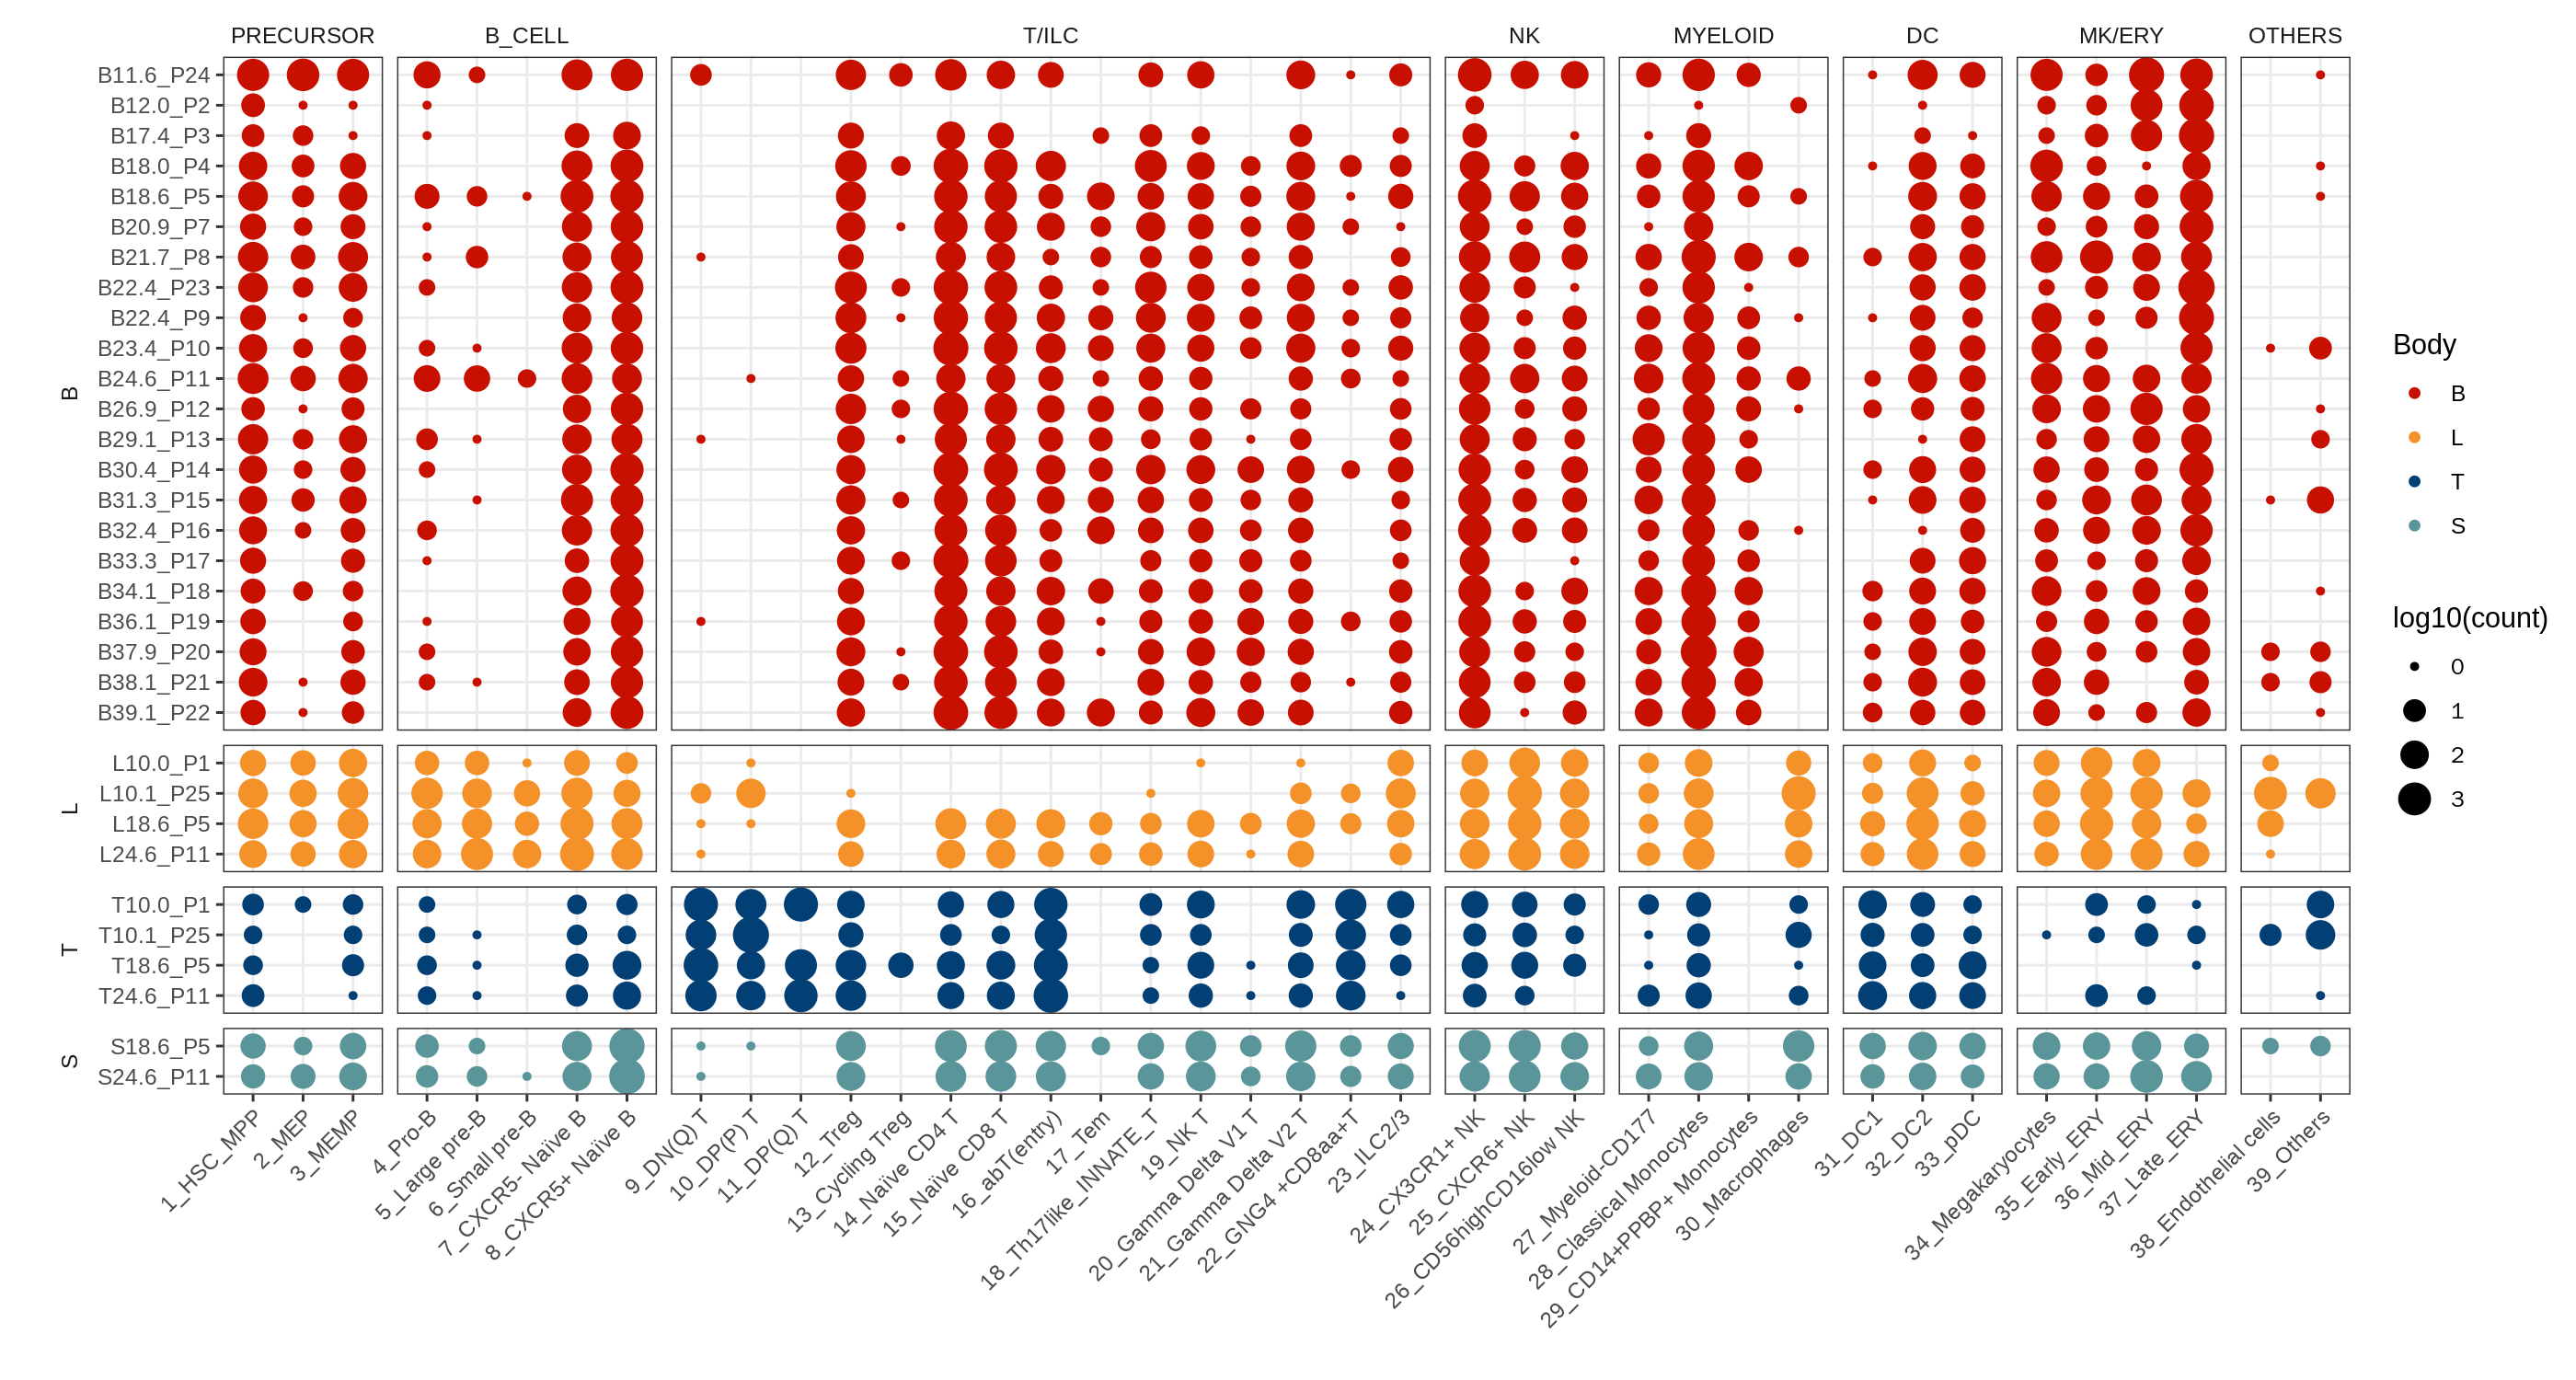

In [62]:
%%R -w 2800 -h 1500 -r 200
grouped_data_result$Cell_lineage<-factor(grouped_data_result$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))
grouped_data_result$Body<-factor(grouped_data_result$Body,level=c('B','L','T','S'))
P1p2=ggplot(grouped_data_result )+ geom_point(aes(x=Last_cell_type_num,y= factor(AdjustedID,level=rev(levels(factor(CD45_result$AdjustedID)))),size=log10(count),color=Body)
                                )+

facet_grid(Body ~ Cell_lineage,, space = "free", scales = "free", switch = "y") + theme_bw()+ 
scale_color_manual(values= c('#C71000FF',"#f49128","#023f75","#5A9599FF"))+ 
 theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.background = element_blank(),
    strip.placement = "",  # place facet labels outside the plot area
    strip.text.y.left = element_text(angle = 90)  # rotate facet labels to vertical
  ) +
  xlab('') + ylab('')
ggsave(plot=P1p2,'/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure1/SupR1_Unorganized/Sup_allsum.pdf',width=12,height=8)
P1p2

In [63]:
%%R
CD45_result2<-CD45_result[,colnames(CD45_result) %in% c("AdjustedID","Last_cell_type_num" ,"percentage")]

In [64]:
%%R
colnames(CD45_result)

 [1] "AdjustedID"         "Part1"              "Body"              
 [4] "Week"               "Part2"              "Last_cell_type_num"
 [7] "Cell_lineage"       "count"              "week_total"        
[10] "percentage"         "week_number"        "AdjustedID_numeric"
[13] "AdjustedID_letter" 


In [65]:
%%R
grouped_data_result

# A tibble: 961 × 14
   AdjustedID Part1 Body  Week  Part2 Last_cell_type_num   Cell_lineage count
   <chr>      <chr> <fct> <chr> <chr> <fct>                <fct>        <int>
 1 B11.6_P24  B11   B     11    6_P24 12_Treg              T/ILC          247
 2 B11.6_P24  B11   B     11    6_P24 13_Cycling Treg      T/ILC           13
 3 B11.6_P24  B11   B     11    6_P24 14_Naïve CD4 T       T/ILC          444
 4 B11.6_P24  B11   B     11    6_P24 15_Naïve CD8 T       T/ILC           96
 5 B11.6_P24  B11   B     11    6_P24 16_abT(entry)        T/ILC           31
 6 B11.6_P24  B11   B     11    6_P24 18_Th17like_INNATE_T T/ILC           21
 7 B11.6_P24  B11   B     11    6_P24 19_NK T              T/ILC           58
 8 B11.6_P24  B11   B     11    6_P24 1_HSC_MPP            PRECURSOR      655
 9 B11.6_P24  B11   B     11    6_P24 21_Gamma Delta V2 T  T/ILC          114
10 B11.6_P24  B11   B     11    6_P24 22_GNG4 +CD8aa+T     T/ILC            1
# ℹ 951 more rows
# ℹ 6 more variables: wee

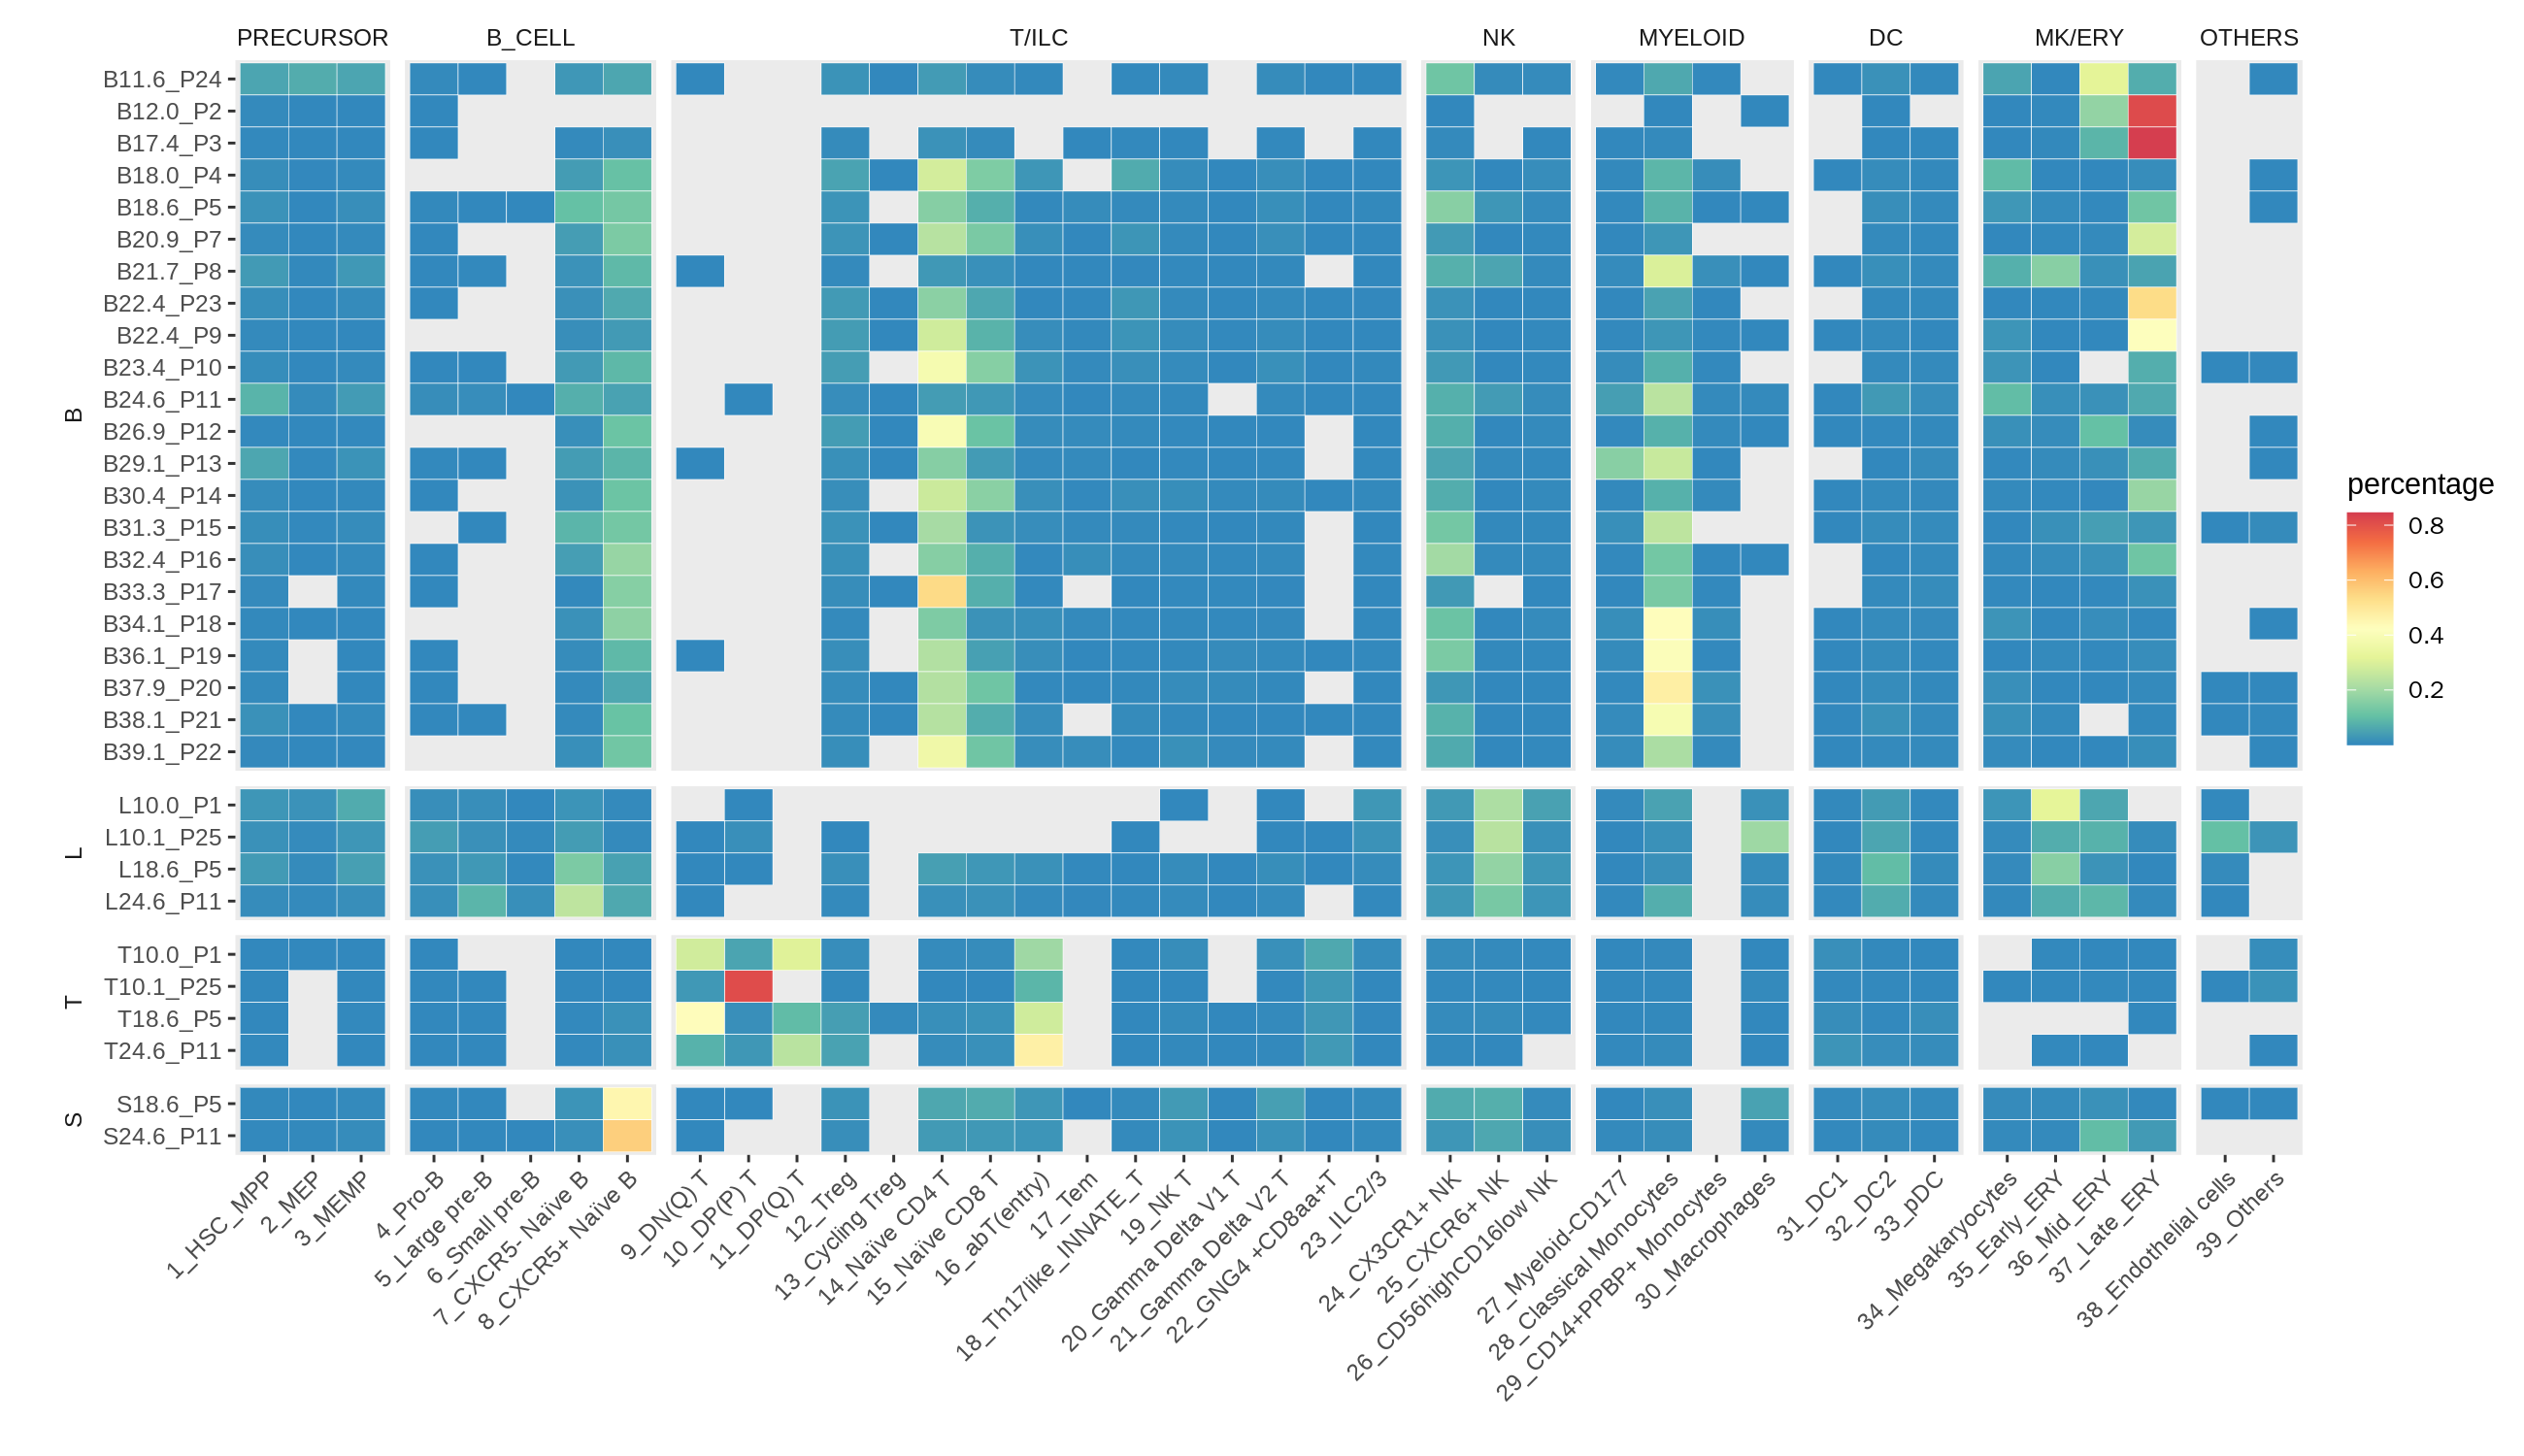

In [66]:
%%R -w 2600 -h 1500 -r 200
# CD45_result$Cell_lineage<-factor(CD45_result$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))
grouped_data_result$Cell_lineage<-factor(grouped_data_result$Cell_lineage,level=c('PRECURSOR','B_CELL','T/ILC','NK','MYELOID','DC','MK/ERY','OTHERS'))

ggplot(grouped_data_result )+ 
# geom_tile(aes(x=Last_cell_type_num,y= factor(AdjustedID,level=rev(levels(factor(CD45_result$AdjustedID)))),color='white'))+
geom_tile(aes(x=Last_cell_type_num,y= factor(AdjustedID,level=rev(levels(factor(CD45_result$AdjustedID)))),fill=percentage),color='white'
                                )+
facet_grid(Body~ Cell_lineage, space = "free", scales = "free", switch = "y")+
 
 theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
     panel.grid.major = element_blank(),
    strip.background = element_blank(),
    strip.placement = "",  # place facet labels outside the plot area
    strip.text.y.left = element_text(angle = 90)  # rotate facet labels to vertical
  ) +
  xlab('') + ylab('') +scale_fill_gradientn(colours = rev(colorRampPalette(brewer.pal(9, "Spectral"))(100)))